# **TP 1️⃣ & 2️ by CAULLIREAU Dorian** : Mesure d'information à partir de modèle probabilistes

---



## **🔎 Introduction**

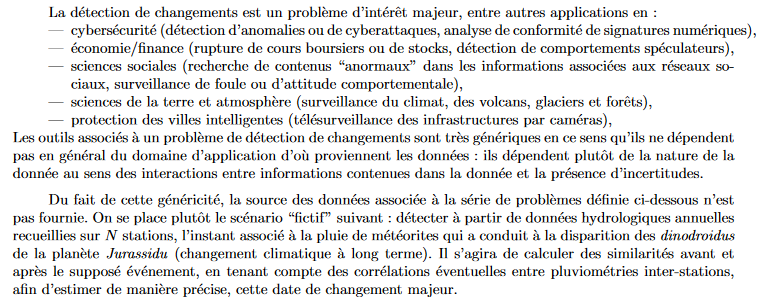

## **Exercice 0️** : Introduction et familisarisation au modèle Gaussien

---



Pour l'ensemble de l'exercice 0️, il est indispensable d'importer les librairies suivantes : 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.integrate import quad
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

### **Analyse numéro 1** : Génération de variable aléatoire

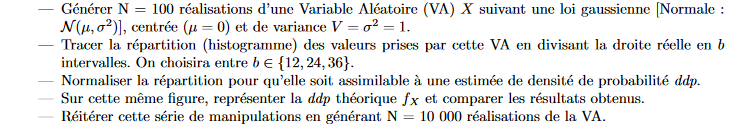

In [ ]:
def gaussien(N, b, mean = 0, std = 1, x_min = -4, x_max = 4):

    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,std)

    data = std * np.random.randn(N) + mean

    plt.hist(data, bins=b, density=True)

    plt.plot(x,y)

    plt.grid()

    plt.title('N = ' + str(N) + ' et b=' + str(b))

    plt.savefig("nd.png")
    plt.show()

Nous pouvons alors essayer avec les différentes valeurs de
 `b = {12,2,36}`

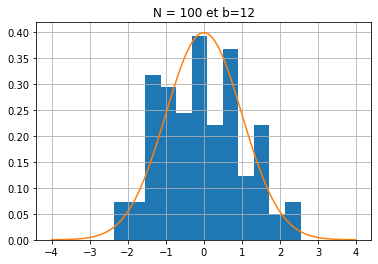

In [ ]:
gaussien(N = 100,b = 12)

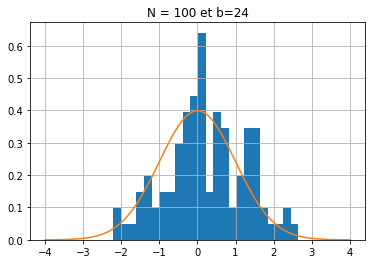

In [ ]:
gaussien(N = 100,b = 24)

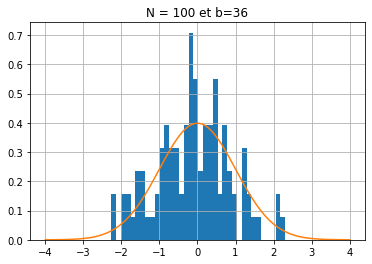

In [ ]:
gaussien(N = 100,b = 36)

Pour normaliser la répartition et qu'elle soit assimilable à une estimée de densité de probabilité, nous utilisons le paramètre *density* lors de la création de l'histogramme. 

```
plt.hist(data, bins=b, density=True)
```

Nous pouvons voir que le modèle est loin du modèle théorique. Avec uniquement 100 tirage, nous ne pouvons pas avoir un résultat proche du modèle théorique. 

Nous pouvons alors augmenter le nombre de tirage N : 

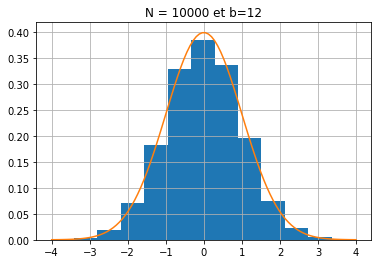

In [ ]:
gaussien(N = 10000,b = 12)

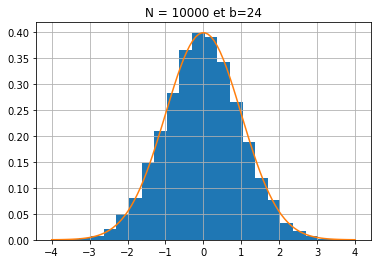

In [ ]:
gaussien(N = 10000,b = 24)

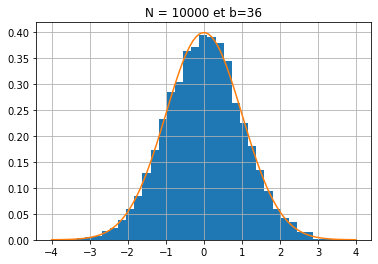

In [ ]:
gaussien(N = 10000,b = 36)

Avec l'augmentaiton du nombre de valeur N, nous pouvons voir que notre modèle se rapproche de plus en plus du modèle théorique.

Nous pouvons alors refaire une simulation avec un N très grand, et augmenter en parralèle le nombre d'intervalle b. 

Par exemple, pour le modèle :          
```
N = 1 000 000 000 
b = 2 000
```



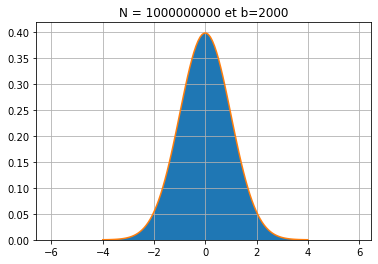

In [ ]:
gaussien(N = 1000000000,b = 2000)

Nous pouvons voir que notre estimation se rapproche énormément du modèle théorique. Le seul problème avec l'augmentation drastique des valeurs est le temps d'éxécution, plus nous avons un nombre de valeur important, plus le temps d'éxécution sera important. 

Nous pouvons donc conclure que pour avoir une meilleure précision, **nous devons augmenter le nombre de tirage, et le nombre d'intervale.**

---

### **Analyse numéro 2** : Modification du comportement avec le changement de la moyenne et de la variance. 

Nous allons refaire la même approche, avec une moyenne et une variance différente plus importante. 

Pour gagner du temps en corréalation avec l'analyse précédente, nous allons directement utiliser un N **nettement suppérieur à 100**. 

Voici les paramètres choisit :        

```
N = 1 000 000
b = {12,24,36}
mean = 2 
std = 3
```

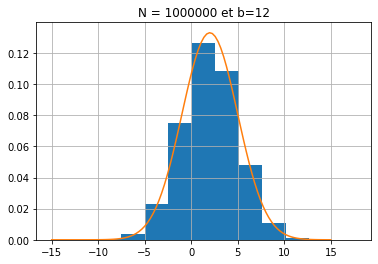

In [ ]:
gaussien(N = 1000000, b = 12, mean = 2, std = 3, x_min = -15, x_max = 15)

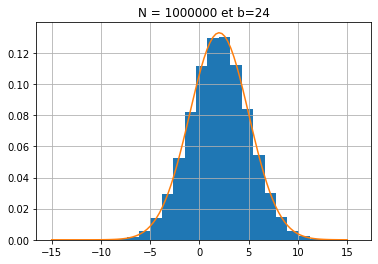

In [ ]:
gaussien(N = 1000000, b = 24, mean = 2, std = 3, x_min = -15, x_max = 15)

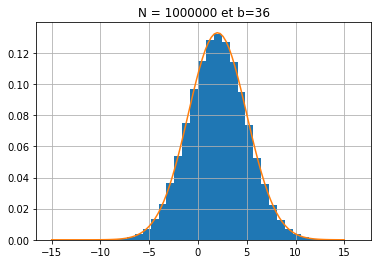

In [ ]:
gaussien(N = 1000000, b = 36, mean = 2, std = 3, x_min = -15, x_max = 15)

Nous pouvons voir le même comportement que l'analayse précédente, plus nous augmentons le nombre d'intervale b, plus nous avons un résultat proche du modèle théorique.

Nous devons alors augmenter de façon plus importante le nombre d'intervalle, pour avoir un résultat le plus proche possible du modèle théorique. 

Nous pouvons alors essayer avec les mêmes valeurs que l'analyse précédente :      


```
N = 1 000 000 000 
b = 2 000
```

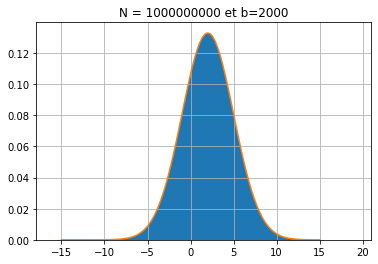

In [ ]:
gaussien(N = 1000000000, b = 2000, mean = 2, std = 3, x_min = -15, x_max = 15)

Nous pouvons voir une nouvelle fois le même comportement, plus nous augmentons le nombre de tirage N et le nombre d'intervale b, plus nous avons un modèle proche du modèle théorique. 

---

### **Analyse numéro 3** : Fluctuation des estimateurs empiriques

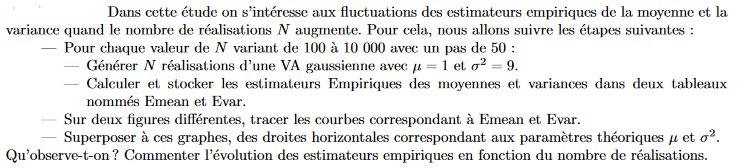

In [ ]:
def estimateurs_empiriques(N, step, mean, std):

    arrayMean = []
    arrayVar = []
    values = []

    for element in range(100, N, step):
        data = std * np.random.randn(element) + mean
        values.append(element)
        arrayMean.append(np.mean(data[100:element]))
        arrayVar.append(np.std(data[100:element]))

    plt.subplot(211)
    plt.plot(values, arrayMean)
    plt.title("Evolution de la moyenne w/ mean = " + str(mean) + " et std = " + str(std))
    plt.axhline(y=mean, color="red")
    plt.savefig("nb.png")
    plt.show()

    plt.subplot(212)
    plt.plot(values, arrayVar)
    plt.title("Evolution de la variance w/ mean = " + str(mean) + " et std = " + str(std))
    plt.axhline(y=std, color="red")
    plt.savefig("nb.png")
    plt.show()

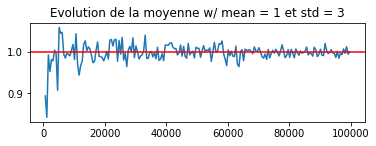

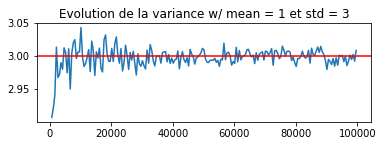

In [ ]:
estimateurs_empiriques(N = 100000, step = 500, mean = 1, std = 3)

Une nouvelle fois et avec cette nouvelle analyse, nous avons pu voir qu'avec l'augmentation du nombre d'analyse, nous avons un modèle qui se rapproche du modèle théorique. 

Lorsque nous avons peu de réalisations les valeurs sont très diffuse, elles deviennent ensuite beaucoup plus proche au fur et à mesure. 

## **Exercice 1️⃣** : Sélection et validation du modèle
---

L'exercice porte maintenant sur l'utilisation d'un ensemble de données. Si nous utilisions précédément des aléatoires, nous avons maintenant des données réelles, permettant une analyse plus concrète .

Avant toute chose, il est important de charger l'ensemble des librairies indispensables  :
  

In [ ]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

Pour importer les données dans ce fichier, j'ai ajouté le fichier directement sur un serveur web :    

In [ ]:
!wget https://caullireau.com/X_pluv.mat
mat_pluv = scipy.io.loadmat('X_pluv.mat')

--2022-01-10 16:11:41--  https://caullireau.com/X_pluv.mat
Resolving caullireau.com (caullireau.com)... 54.36.91.62
Connecting to caullireau.com (caullireau.com)|54.36.91.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7440158 (7.1M)
Saving to: ‘X_pluv.mat’

X_pluv.mat          100%[===================>]   7.09M  5.34MB/s    in 1.3s    

2022-01-10 16:11:44 (5.34 MB/s) - ‘X_pluv.mat’ saved [7440158/7440158]



Nous pouvons alors voir l'ensemble des données, en fonction des villes. Comme par exemple avec Annecyidu, Annemasseidu ...

In [ ]:
X1 = mat_pluv["X_pluv"][0]
X2 = mat_pluv["X_pluv"][1]

print("Matrice des informations de Annecyidu " + str(X1))
print("Matrice des informations de Annemasseidu " + str(X1))

Matrice des informations de Annecyidu [10.76037616 12.59350506  6.80550813 ... 12.85375176 11.99609664
 11.10289138]
Matrice des informations de Annemasseidu [10.76037616 12.59350506  6.80550813 ... 12.85375176 11.99609664
 11.10289138]


### **Etape 1** : Calcule des matrices de covariance des 3 premières villes

In [ ]:
X1 = mat_pluv["X_pluv"][0]
X2 = mat_pluv["X_pluv"][1]
X3 = mat_pluv["X_pluv"][2]

COVx12 = np.cov(X1,X2)
COVx23 = np.cov(X2,X3)
COVx31 = np.cov(X3,X1)

print("Matrice de covariance Ville 1 x Ville 2 :")
print(COVx12)
print("Matrice de covariance Ville 2 x Ville 3 :")
print(COVx23)
print("Matrice de covariance Ville 3 x Ville 1 :")
print(COVx31)

Matrice de covariance Ville 1 x Ville 2 :
[[1.05945356 0.03792308]
 [0.03792308 1.04421192]]
Matrice de covariance Ville 2 x Ville 3 :
[[1.04421192 0.03195589]
 [0.03195589 1.07320364]]
Matrice de covariance Ville 3 x Ville 1 :
[[1.07320364 0.0375571 ]
 [0.0375571  1.05945356]]


A l'aide des calculs de covariance, nous pouvons observer que le maximum de vraissemblance est entre la ville 1 et 2 (Annecy & Annemasse). 

Nous le voyons avec l'analyse de la matrice antidiagonale (valeur la plus proche de 1. 

```
[[1.05945356 0.03792308]
 [0.03792308 1.04421192]]
```


### **Etape 2** : Calcul de l'histogramme bivarié. 

Nous pouvons maintenant afficher les histogrammes bivariée pour l'ensemble des couples de villes. 

Nous pouvons voir une représentation avec un histogramme en 3d et une études valeurs par rapproche au centre. 


In [ ]:
def histo3d(M1, M2, M1name, M2name):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(M1, M2, bins=60,density=True)

    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    plt.title("Histogramme 3D de la matrice de covariance entre " + str(M1name) + " et " + str(M2name))

    plt.show()

Ainsi qu'une représentation avec un histogramme en 2D, pour étudier la vraissemblance avec le modèle théorique.

In [ ]:
def histo2d(M1, M2, M1name, M2name):
    linspace = np.linspace(5,15,100)
    plt.hist([M1,M2], density=True, bins=50)
    plt.plot(linspace, scipy.stats.norm.pdf(linspace, 11, 1))
    plt.title("Histogramme 2D de la matrice de covariance entre " + str(M1name) + " et " + str(M2name))
    plt.show()

Nous pouvons alors, pour l'ensemble de scouples de villes, les visualisations suivantes :

Pour le couple de ville X1 et X2 : 

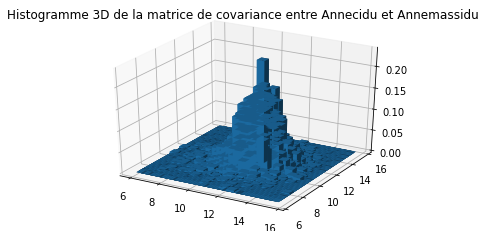

AttributeError: ignored

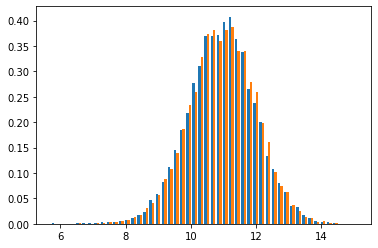

In [ ]:
histo3d(X1,X2, "Annecidu", "Annemassidu")
histo2d(X1,X2, "Annecidu", "Annemassidu")

Pour le couple de ville X2 et X3 : 

In [ ]:
histo3d(X2,X3, "Annemassidu", "Atlanidu")
histo2d(X2,X3, "Annemassidu", "Atlanidu")

Pour le couple de ville X1 et X3 :

In [ ]:
histo3d(X1,X3, "Annecidu", "Atlanidu")
histo2d(X1,X3, "Annecidu", "Atlanidu")

Nous pouvons alors conclure qu'avec les histogrammes bivariés, nous avons des données correcte et qui se rapprochent du modèle théorique. 

Nous pouvons cépendent voir que localement, un grand nombre de données manquent pour vérifier le modèle théorique. 

Avec ces mêmes analyses et le modèle 3D, nous pouvons verifier que le couple entre les ville X1 et X2 sont le plus proche. 

## **Exercice 2️⃣** : Analyse globale par entropie relative

---

Dans cette exercice, et dans le même principe que l'exercice précédent, nous devons vérifier la bonne lecture des données, ainsi que l'import de l'ensemble des dépendances de python indispensables.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.stats
import math


!wget https://caullireau.com/X_pluv.mat
mat_pluv = scipy.io.loadmat('X_pluv.mat')

--2022-01-11 07:28:19--  https://caullireau.com/X_pluv.mat
Resolving caullireau.com (caullireau.com)... 54.36.91.62
Connecting to caullireau.com (caullireau.com)|54.36.91.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7440158 (7.1M)
Saving to: ‘X_pluv.mat’

X_pluv.mat          100%[===================>]   7.09M  46.4MB/s    in 0.2s    

2022-01-11 07:28:20 (46.4 MB/s) - ‘X_pluv.mat’ saved [7440158/7440158]





D'après les données de l'exercices, nous savons que pour l'ensemble des données, nous avons un changement important en moyenne vers **l'ordre de temps ~ 365**

Nous utilisons une analyse globale par entropie avec les différents paramètres et objets
*   **'X_pluv.mat'** le fichier comprennant l'ensemble des informations sur chaque ville
*   **N** qui représente le nombre de valeurs pour chaque ville
*   l'attribut **fenetre** qui représente la taille de l'échantillon étudié 
*   l'attribut **step** qui est le pas de recherche, plus le pas sera faible pour les traitements seront importants et donc lourd. 

Pour déterminer l'entropie relative sous format globale nous allons utiliser le système suivant :

**Un intervale d'étude :**

```
X1 = mat["X_pluv"][city][0:element-1] # L'intervale de gauche, représentant les valeurs à gauche de l'élément étudié
X2 = mat["X_pluv"][city][element+1:N] # L'intervale de droite, représentant les valeurs à droite de l'élément étudié
```

**Des paramètres d'études :**

```
N = 10000 # Le nombre de valeur pour chaque pays
fenetre = 200 # La taille de la fenêtre pour avoir une analyse avec un nombre de valeur adéquant
step = 1 # La réduction du step au minimum pour avoir le traitement le plus large possible
```

**Un calcul d'entropie relative :** 

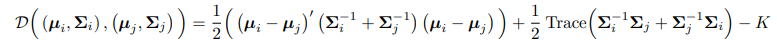

**Sous un intervale** 🔽

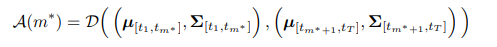



**Comprendre les valeurs et les changements :**

Pour comprendre la nature de la modification des valeurs via l'analyse locale, il est possible de comparer la variance ainsi que la moyenne pour chaque ville. 

Via cette analyse, nous allons voir si le changement porte sur un fort changement de variance ou un fort changement de moyenne. 

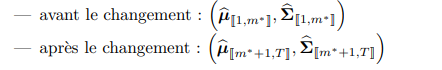

In [ ]:
def entropie(mat, file_name, N, fenetre, step, method):

    Entropie_totale = []
    for city in range(len(mat[file_name])):

        Entropie = []

        meanArrayAvant = []
        meanArrayApres = []
        stdArrayAvant = []
        stdArrayApres = []

        print(city)

        for element in range(fenetre, N-fenetre, step):

            if(method == "globale"):
              X1 = mat[file_name][city][0:element-1]
              X2 = mat[file_name][city][element+1:N]

            if(method == "locale"):
              X1 = mat[file_name][city][element - fenetre:element-1]
              X2 = mat[file_name][city][element:element + fenetre]

            mu1 = np.mean(X1)
            mu2 = np.mean(X2)
            si1 = np.std(X1)
            si2 = np.std(X2)

            meanArrayAvant.append(mu1)
            meanArrayApres.append(mu2)
            stdArrayAvant.append(si1)
            stdArrayApres.append(si2)

            entropie = ((1 / 2) * ((mu1 - mu2) ** 2) * (1 / ((si1 ** 2) + (si2 ** 2))) + (1 / 2) * (((si2 ** 2) / (si1 ** 2)) + ((si1 ** 2) / (si2 ** 2))) - 1)

            Entropie.append(entropie)

        index = Entropie.index(max(Entropie)) * step + fenetre

        Entropie_totale.append(index)
        print("Analyse pour la ville par la méthode" + str(method) +" : " + str(city))
        print("Changement maximum à la position : " + str(index))
        print("Nous avons dynamiquement un moyenne de : " + str(np.mean(Entropie_totale)))
        print("Avant le changement : [" + str(stdArrayAvant[index]) + "," + str(meanArrayAvant[index]) + "]")
        print("Après le changement : [" + str(stdArrayApres[index]) + "," + str(meanArrayApres[index]) + "]")
        plt.plot(Entropie, label="Trace entropie globale")    
        plt.axvline(x=(index - fenetre), color="red", label="Entropie maximal Globale")
        plt.grid()
        plt.legend()
        plt.show()
        print("################################")
      
    print("################################END################################")


In [ ]:
entropie(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1, method = "globale")

0
200


ValueError: ignored

**Analyse des résultats**

Voici un exemple d'exécution du programme pour **la ville numéro 4**.

Nous pouvons voir sur cette ville les résultats suivants : 

Le lieu de changement maximal pour cette ville est de 349 en unité de temps. 

Via l'analyse des lois correspondantes avant et après le changement, nous pouvons voir une forte modification de la variance. Ce qui explique la ligne la forte variance entre les deux moments analysés.

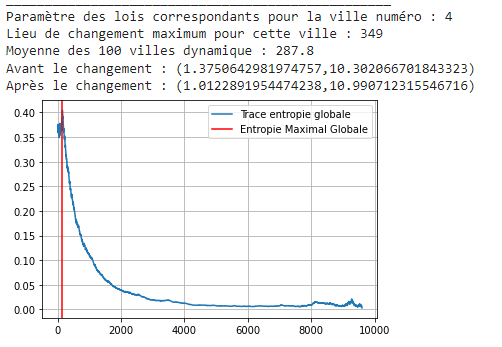


## **Exercice 3️⃣** : Analyse locale par entropie relative

---

Nous utilisons une analyse locale par entropie avec les différents paramètres et objets
*   **'X_pluv.mat'** le fichier comprennant l'ensemble des informations sur chaque ville
*   **N** qui représente le nombre de valeurs pour chaque ville
*   l'attribut **fenetre** qui représente la taille de l'échantillon étudié 
*   l'attribut **step** qui est le pas de recherche, plus le pas sera faible pour les traitements seront importants et donc lourd. 

Pour déterminer l'entropie relative sous format globale nous allons utiliser le système suivant :

**Un intervale d'étude :**

```
X1 = mat["X_pluv"][city][element - fenetre:element-1] # L'intervale de gauche, représentant les valeurs à gauche de l'élément étudié
X2 = mat["X_pluv"][city][element:element + fenetre] # L'intervale de droite, représentant les valeurs à droite de l'élément étudié
```

**Des paramètres d'études :**

```
N = 10000 # Le nombre de valeur pour chaque pays
fenetre = 200 # La taille de la fenêtre pour avoir une analyse avec un nombre de valeur adéquant
step = 1 # La réduction du step au minimum pour avoir le traitement le plus large possible
```

**Un calcul d'entropie relative :** 



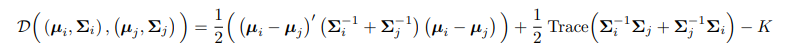

**Sous un intervale** 🔽

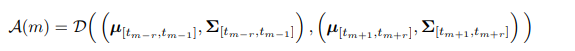

**Comprendre les valeurs et les changements :**

Pour comprendre la nature de la modification des valeurs via l'analyse locale, il est possible de comparer la variance ainsi que la moyenne pour chaque ville. 

Via cette analyse, nous allons voir si le changement porte sur un fort changement de variance ou un fort changement de moyenne. 

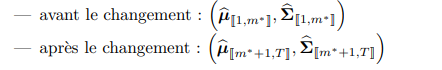

Analyse pour la ville par la méthodelocale : 0
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 356.0
Avant le changement : [0.9092418497438138,10.991468066935608]
Après le changement : [0.9753070234895155,10.944235201665848]


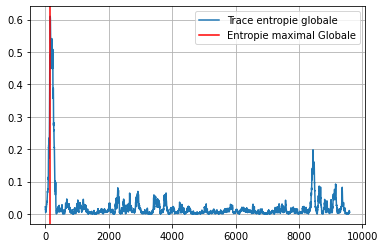

################################
Analyse pour la ville par la méthodelocale : 1
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 356.0
Avant le changement : [0.9879000041430395,11.143995349618345]
Après le changement : [0.9827126791675775,10.91596430022032]


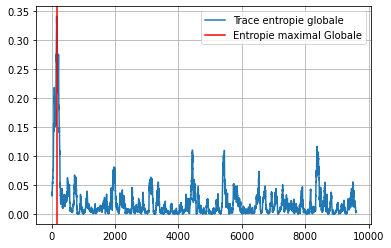

################################
Analyse pour la ville par la méthodelocale : 2
Changement maximum à la position : 354
Nous avons dynamiquement un moyenne de : 355.3333333333333
Avant le changement : [1.0429025532888982,10.982932914027428]
Après le changement : [1.0941852143591333,11.096472964131026]


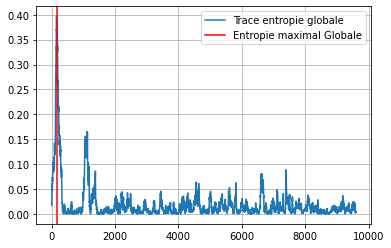

################################
Analyse pour la ville par la méthodelocale : 3
Changement maximum à la position : 351
Nous avons dynamiquement un moyenne de : 354.25
Avant le changement : [0.9548806776230266,11.012187789548271]
Après le changement : [0.9840151767693999,11.044616019563064]


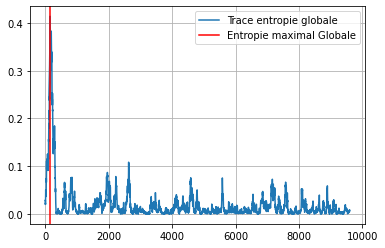

################################
Analyse pour la ville par la méthodelocale : 4
Changement maximum à la position : 359
Nous avons dynamiquement un moyenne de : 355.2
Avant le changement : [1.032547563826014,11.001027341282812]
Après le changement : [1.0192443857041371,10.892446946430514]


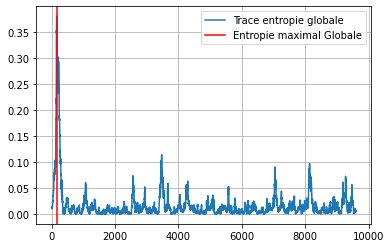

################################
Analyse pour la ville par la méthodelocale : 5
Changement maximum à la position : 360
Nous avons dynamiquement un moyenne de : 356.0
Avant le changement : [1.0030109618075103,11.035666762589784]
Après le changement : [0.9909011349711452,11.047276610665723]


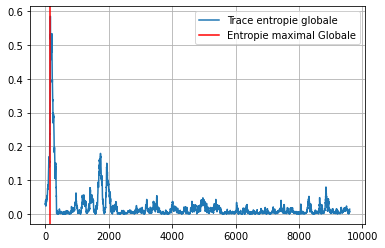

################################
Analyse pour la ville par la méthodelocale : 6
Changement maximum à la position : 375
Nous avons dynamiquement un moyenne de : 358.7142857142857
Avant le changement : [0.9254735919552812,10.99345957399359]
Après le changement : [0.9838384854143459,10.965949454555027]


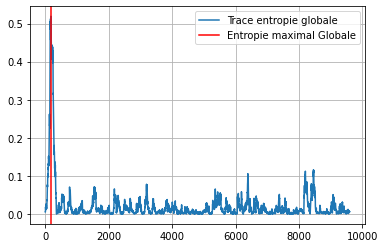

################################
Analyse pour la ville par la méthodelocale : 7
Changement maximum à la position : 373
Nous avons dynamiquement un moyenne de : 360.5
Avant le changement : [1.0357129865262578,10.998372811390349]
Après le changement : [1.0033381445085678,10.95499405671051]


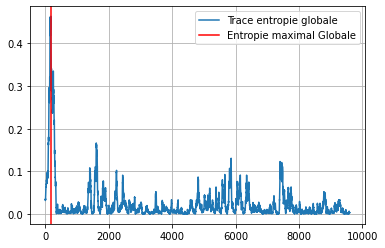

################################
Analyse pour la ville par la méthodelocale : 8
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 359.8888888888889
Avant le changement : [1.0331315528457494,11.111809645009703]
Après le changement : [1.0531732350255352,10.898153140723853]


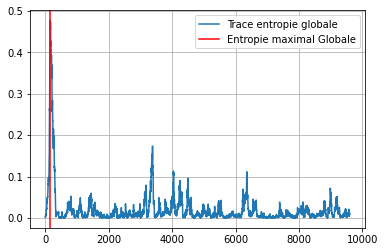

################################
Analyse pour la ville par la méthodelocale : 9
Changement maximum à la position : 414
Nous avons dynamiquement un moyenne de : 365.3
Avant le changement : [0.9253731315570491,11.263120315215271]
Après le changement : [1.0506561413364714,10.96804793394877]


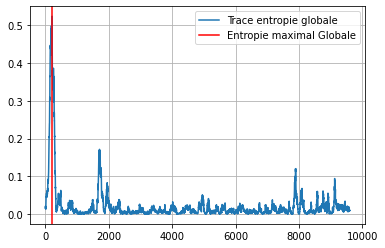

################################
Analyse pour la ville par la méthodelocale : 10
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 364.6363636363636
Avant le changement : [0.9795161156108155,10.838964500616033]
Après le changement : [1.0164132582814804,10.950416578901994]


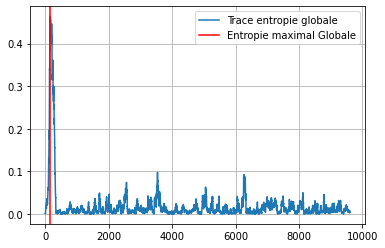

################################
Analyse pour la ville par la méthodelocale : 11
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 364.0833333333333
Avant le changement : [0.9986874158861321,10.91564900301996]
Après le changement : [1.0752440424448315,11.045941739592267]


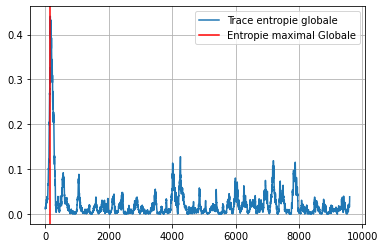

################################
Analyse pour la ville par la méthodelocale : 12
Changement maximum à la position : 363
Nous avons dynamiquement un moyenne de : 364.0
Avant le changement : [0.934383808545151,10.975277897426908]
Après le changement : [0.9297543571327777,11.053538776079726]


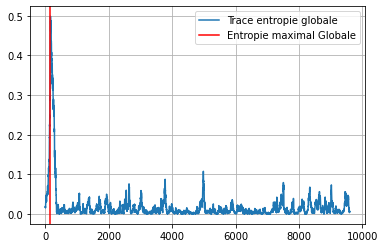

################################
Analyse pour la ville par la méthodelocale : 13
Changement maximum à la position : 375
Nous avons dynamiquement un moyenne de : 364.7857142857143
Avant le changement : [0.9302590563925712,11.01498908117671]
Après le changement : [1.020682714217169,11.132256860668932]


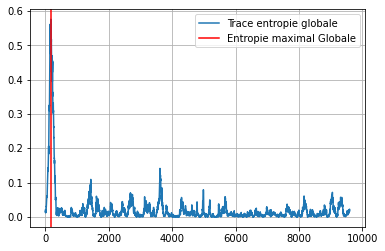

################################
Analyse pour la ville par la méthodelocale : 14
Changement maximum à la position : 353
Nous avons dynamiquement un moyenne de : 364.0
Avant le changement : [0.9416917448130067,11.158667940368884]
Après le changement : [0.9419165627839361,11.032409748449286]


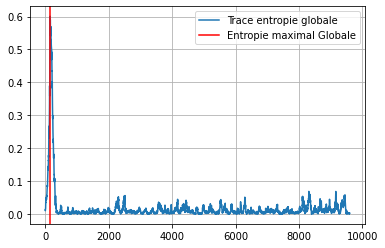

################################
Analyse pour la ville par la méthodelocale : 15
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 363.5
Avant le changement : [1.0191648183753805,11.109119689220096]
Après le changement : [1.025324341049986,11.101187368869569]


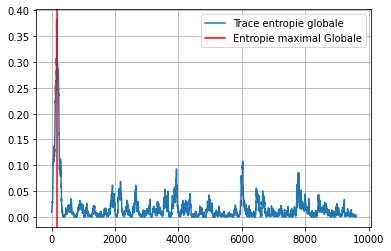

################################
Analyse pour la ville par la méthodelocale : 16
Changement maximum à la position : 367
Nous avons dynamiquement un moyenne de : 363.70588235294116
Avant le changement : [0.9771059644857822,10.897665576577547]
Après le changement : [1.008994675082955,10.905174537547722]


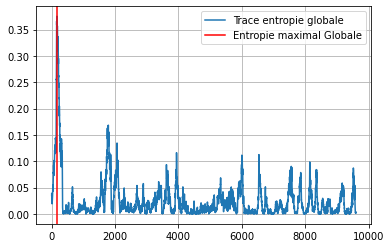

################################
Analyse pour la ville par la méthodelocale : 17
Changement maximum à la position : 370
Nous avons dynamiquement un moyenne de : 364.05555555555554
Avant le changement : [0.9767553512560415,11.006365328055995]
Après le changement : [0.983231979057153,11.055477178720421]


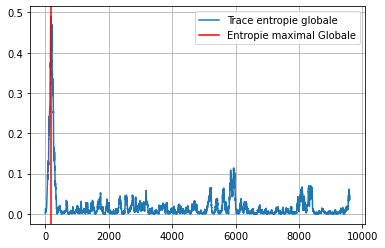

################################
Analyse pour la ville par la méthodelocale : 18
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 363.6842105263158
Avant le changement : [0.9979181277139966,10.936581668891513]
Après le changement : [0.9578167347094575,10.994716484712079]


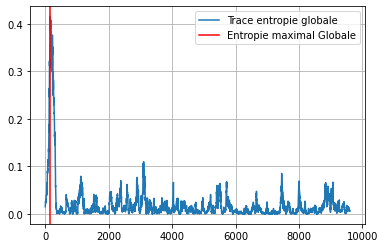

################################
Analyse pour la ville par la méthodelocale : 19
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 363.4
Avant le changement : [1.011632816265513,10.899915956704962]
Après le changement : [1.0695480757747535,11.022310709344662]


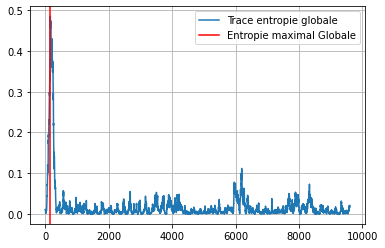

################################
Analyse pour la ville par la méthodelocale : 20
Changement maximum à la position : 371
Nous avons dynamiquement un moyenne de : 363.76190476190476
Avant le changement : [0.9626993026697922,10.93670661834333]
Après le changement : [0.9607044792138054,10.874559241138726]


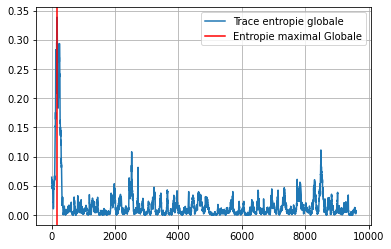

################################
Analyse pour la ville par la méthodelocale : 21
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 363.40909090909093
Avant le changement : [0.953359366207638,11.021910038395065]
Après le changement : [1.110383733151941,10.914392412165366]


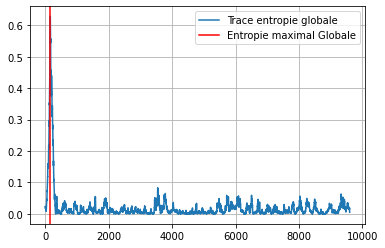

################################
Analyse pour la ville par la méthodelocale : 22
Changement maximum à la position : 381
Nous avons dynamiquement un moyenne de : 364.17391304347825
Avant le changement : [0.9088503524446713,10.998556077233527]
Après le changement : [0.9354612717715993,10.93529515152485]


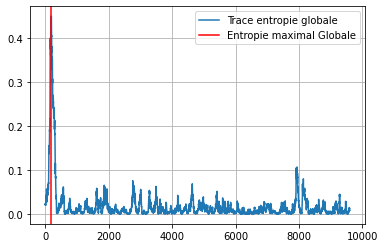

################################
Analyse pour la ville par la méthodelocale : 23
Changement maximum à la position : 368
Nous avons dynamiquement un moyenne de : 364.3333333333333
Avant le changement : [0.9397737820012521,10.846075193500207]
Après le changement : [0.9632635411849473,10.827777515728386]


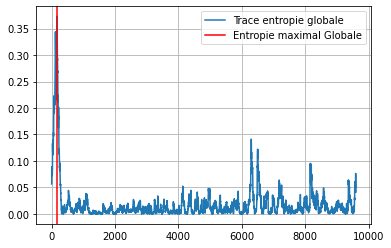

################################
Analyse pour la ville par la méthodelocale : 24
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 364.04
Avant le changement : [0.9690976098257025,11.154965788002038]
Après le changement : [0.9866178459974777,11.125990690483269]


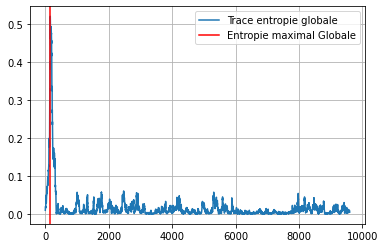

################################
Analyse pour la ville par la méthodelocale : 25
Changement maximum à la position : 384
Nous avons dynamiquement un moyenne de : 364.8076923076923
Avant le changement : [0.9224328339890693,10.986149548122373]
Après le changement : [1.036695697552126,10.848391989982757]


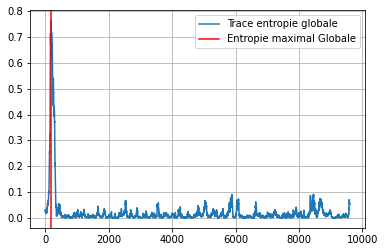

################################
Analyse pour la ville par la méthodelocale : 26
Changement maximum à la position : 411
Nous avons dynamiquement un moyenne de : 366.51851851851853
Avant le changement : [0.9923040777260768,11.014094211876433]
Après le changement : [0.9261030799942617,11.031862413333938]


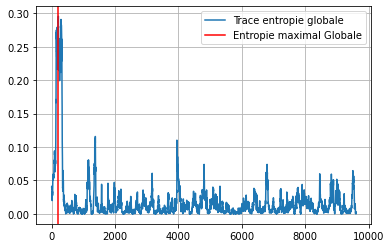

################################
Analyse pour la ville par la méthodelocale : 27
Changement maximum à la position : 437
Nous avons dynamiquement un moyenne de : 369.0357142857143
Avant le changement : [0.9718938740068614,11.03639530328993]
Après le changement : [1.096639596430285,11.002583386387423]


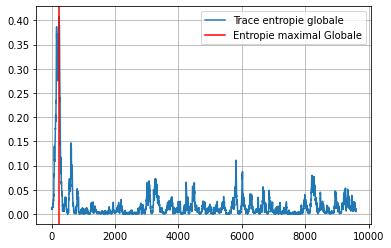

################################
Analyse pour la ville par la méthodelocale : 28
Changement maximum à la position : 360
Nous avons dynamiquement un moyenne de : 368.7241379310345
Avant le changement : [1.0404664961736638,10.982358126853056]
Après le changement : [1.0202331452556999,10.91657146295918]


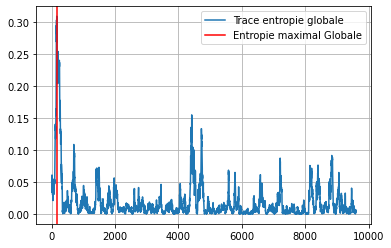

################################
Analyse pour la ville par la méthodelocale : 29
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 368.3333333333333
Avant le changement : [0.973703818902172,11.08179770454032]
Après le changement : [1.130053629526533,10.890485591419042]


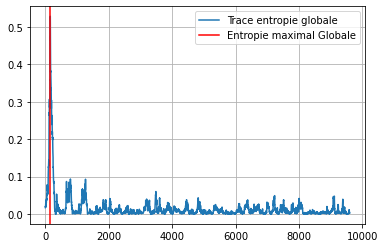

################################
Analyse pour la ville par la méthodelocale : 30
Changement maximum à la position : 388
Nous avons dynamiquement un moyenne de : 368.96774193548384
Avant le changement : [0.9881888314666933,11.002812159953825]
Après le changement : [0.9791963756436883,11.107915520307747]


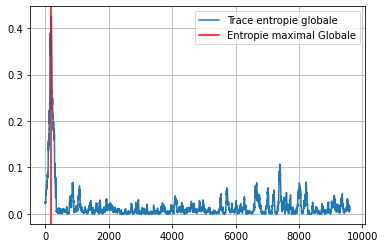

################################
Analyse pour la ville par la méthodelocale : 31
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 368.53125
Avant le changement : [1.0541255782955994,10.932174533230693]
Après le changement : [0.9989613471943153,11.036813566596352]


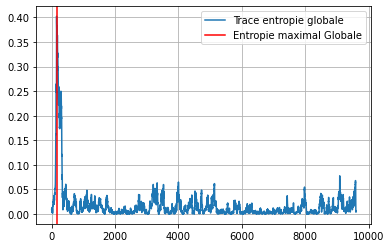

################################
Analyse pour la ville par la méthodelocale : 32
Changement maximum à la position : 361
Nous avons dynamiquement un moyenne de : 368.3030303030303
Avant le changement : [0.9900503857687357,10.93924819535247]
Après le changement : [1.013132832626236,11.01272932184355]


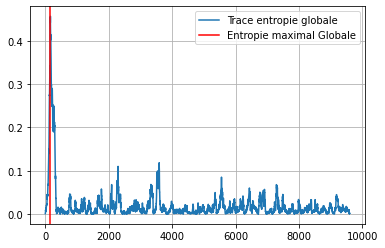

################################
Analyse pour la ville par la méthodelocale : 33
Changement maximum à la position : 363
Nous avons dynamiquement un moyenne de : 368.1470588235294
Avant le changement : [0.9303351412540947,11.036745905842851]
Après le changement : [1.007333460322353,10.91767357778157]


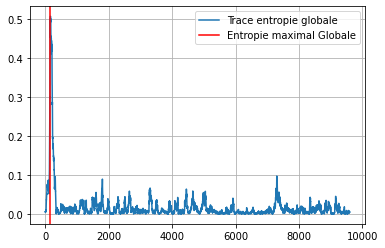

################################
Analyse pour la ville par la méthodelocale : 34
Changement maximum à la position : 361
Nous avons dynamiquement un moyenne de : 367.9428571428571
Avant le changement : [1.0398446440920956,11.04643482436259]
Après le changement : [0.9768528990941944,11.022632732558188]


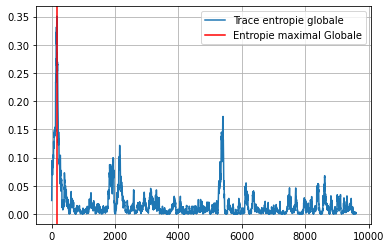

################################
Analyse pour la ville par la méthodelocale : 35
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 367.5833333333333
Avant le changement : [0.9491476206761394,10.988661262481186]
Après le changement : [0.9665180804778798,11.08580656854635]


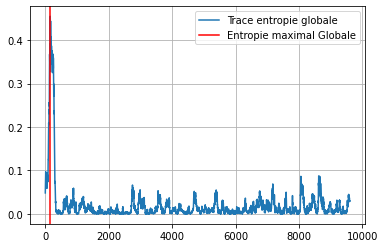

################################
Analyse pour la ville par la méthodelocale : 36
Changement maximum à la position : 428
Nous avons dynamiquement un moyenne de : 369.2162162162162
Avant le changement : [0.9277124496614503,11.069316454654736]
Après le changement : [0.9997799491605428,11.049861651156661]


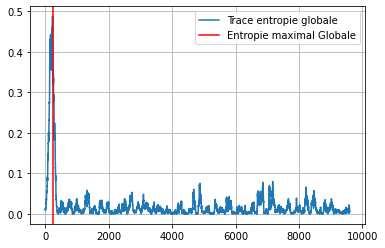

################################
Analyse pour la ville par la méthodelocale : 37
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 368.8421052631579
Avant le changement : [0.9922881852274317,11.034118959426625]
Après le changement : [1.0394158392415052,10.966183950794386]


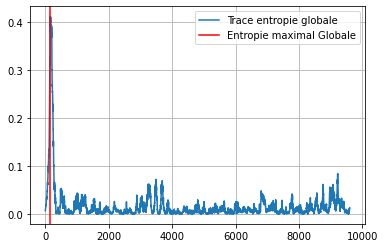

################################
Analyse pour la ville par la méthodelocale : 38
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 368.53846153846155
Avant le changement : [0.9815175183428793,10.916378456851625]
Après le changement : [1.0206709237936331,11.056161182143935]


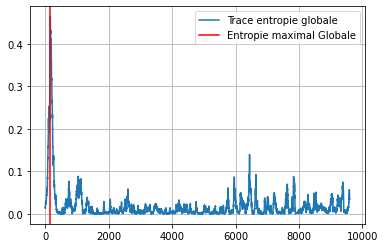

################################
Analyse pour la ville par la méthodelocale : 39
Changement maximum à la position : 451
Nous avons dynamiquement un moyenne de : 370.6
Avant le changement : [1.0403252457621512,10.965602450012852]
Après le changement : [0.9984503664448596,10.877393601126919]


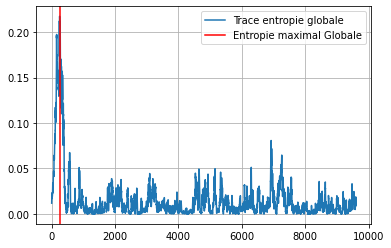

################################
Analyse pour la ville par la méthodelocale : 40
Changement maximum à la position : 372
Nous avons dynamiquement un moyenne de : 370.6341463414634
Avant le changement : [1.0187655761900596,11.068910394043009]
Après le changement : [1.0165375437270654,10.970669057667523]


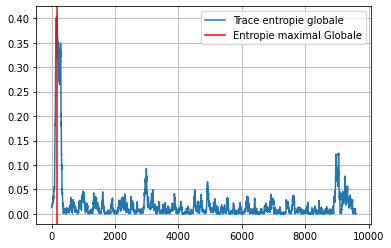

################################
Analyse pour la ville par la méthodelocale : 41
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 370.3095238095238
Avant le changement : [1.0358868446993637,10.986856833686375]
Après le changement : [0.9678250649521996,11.104655415172152]


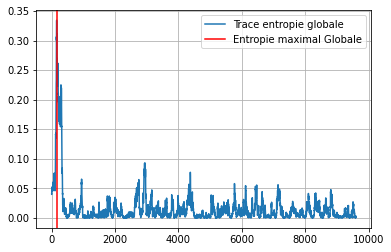

################################
Analyse pour la ville par la méthodelocale : 42
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 369.95348837209303
Avant le changement : [0.9861837032790982,11.002311839688922]
Après le changement : [1.0403716672378711,10.971364935510076]


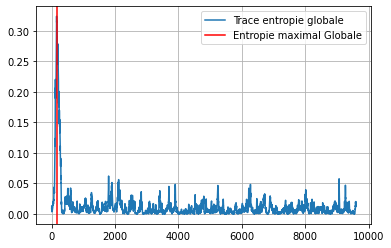

################################
Analyse pour la ville par la méthodelocale : 43
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 369.6818181818182
Avant le changement : [1.0257442204938239,10.984331267080703]
Après le changement : [1.0109168014660341,10.957105996503593]


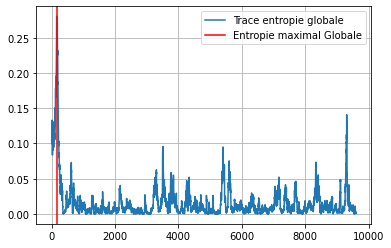

################################
Analyse pour la ville par la méthodelocale : 44
Changement maximum à la position : 372
Nous avons dynamiquement un moyenne de : 369.73333333333335
Avant le changement : [0.9771806097570208,10.905217809491235]
Après le changement : [0.9406929273032747,10.999233543523374]


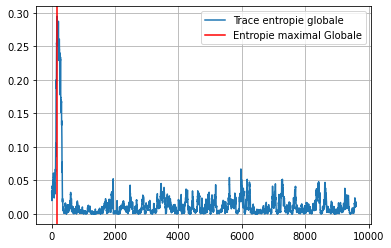

################################
Analyse pour la ville par la méthodelocale : 45
Changement maximum à la position : 350
Nous avons dynamiquement un moyenne de : 369.30434782608694
Avant le changement : [0.9841241586193052,11.005695480769988]
Après le changement : [0.9801653612048924,11.009959565767412]


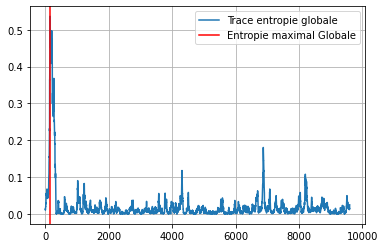

################################
Analyse pour la ville par la méthodelocale : 46
Changement maximum à la position : 348
Nous avons dynamiquement un moyenne de : 368.8510638297872
Avant le changement : [0.9712290944635106,11.131439296585478]
Après le changement : [0.943342328315448,10.911401074238224]


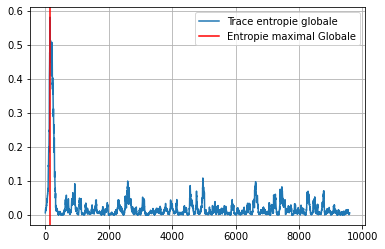

################################
Analyse pour la ville par la méthodelocale : 47
Changement maximum à la position : 370
Nous avons dynamiquement un moyenne de : 368.875
Avant le changement : [0.976027911217643,11.197976765878384]
Après le changement : [0.9516660493462223,11.046045474262177]


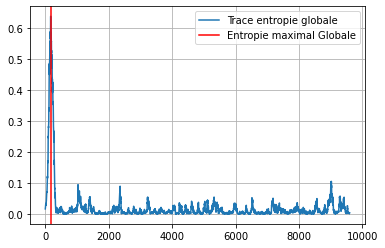

################################
Analyse pour la ville par la méthodelocale : 48
Changement maximum à la position : 390
Nous avons dynamiquement un moyenne de : 369.3061224489796
Avant le changement : [0.8539155621597362,11.076895628249067]
Après le changement : [0.9741133607006335,10.90255885460671]


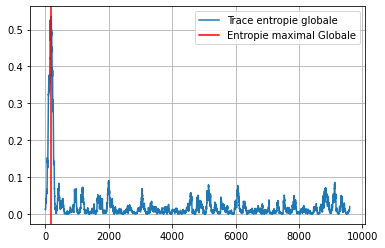

################################
Analyse pour la ville par la méthodelocale : 49
Changement maximum à la position : 409
Nous avons dynamiquement un moyenne de : 370.1
Avant le changement : [1.051603498417445,10.941600825435447]
Après le changement : [1.087104270710986,11.02970575211349]


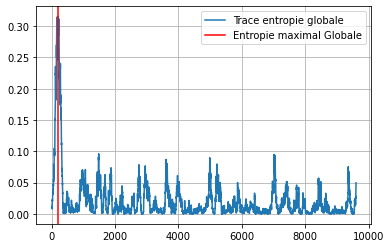

################################
Analyse pour la ville par la méthodelocale : 50
Changement maximum à la position : 354
Nous avons dynamiquement un moyenne de : 369.7843137254902
Avant le changement : [1.0154721315824546,11.018021976532829]
Après le changement : [0.8982299133889876,10.991832079605238]


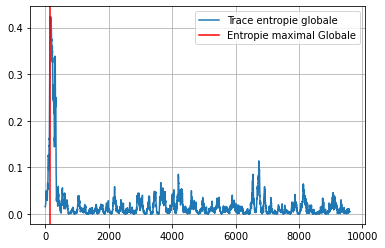

################################
Analyse pour la ville par la méthodelocale : 51
Changement maximum à la position : 360
Nous avons dynamiquement un moyenne de : 369.59615384615387
Avant le changement : [0.9418951923433915,10.957638200760519]
Après le changement : [1.0548792389915924,10.97123819901117]


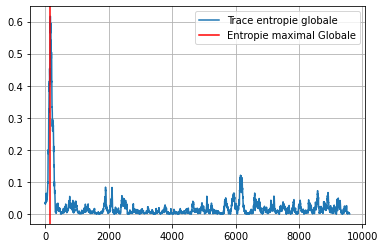

################################
Analyse pour la ville par la méthodelocale : 52
Changement maximum à la position : 340
Nous avons dynamiquement un moyenne de : 369.0377358490566
Avant le changement : [0.9882179891747769,10.93572474579204]
Après le changement : [1.0441798515589853,11.05598176566552]


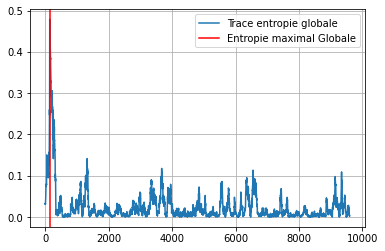

################################
Analyse pour la ville par la méthodelocale : 53
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 368.81481481481484
Avant le changement : [1.1027425917585574,11.073880820854662]
Après le changement : [0.9882837987811119,10.896355573842838]


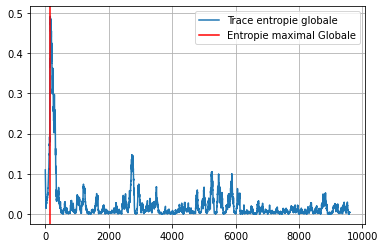

################################
Analyse pour la ville par la méthodelocale : 54
Changement maximum à la position : 354
Nous avons dynamiquement un moyenne de : 368.54545454545456
Avant le changement : [0.9669568594830799,11.025121873912537]
Après le changement : [0.949035230505503,10.967742419157316]


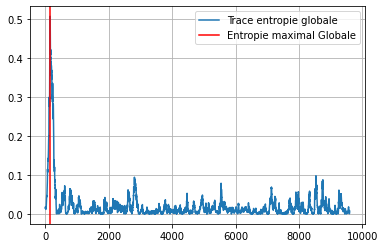

################################
Analyse pour la ville par la méthodelocale : 55
Changement maximum à la position : 380
Nous avons dynamiquement un moyenne de : 368.75
Avant le changement : [1.0041388966580156,10.911170094588783]
Après le changement : [1.0272301031107913,10.992093980077446]


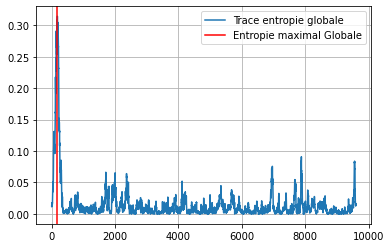

################################
Analyse pour la ville par la méthodelocale : 56
Changement maximum à la position : 366
Nous avons dynamiquement un moyenne de : 368.70175438596493
Avant le changement : [0.9617893368242697,11.029687177955502]
Après le changement : [1.0278092073109375,10.83053002895089]


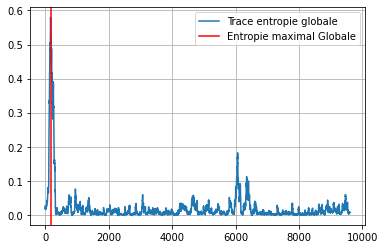

################################
Analyse pour la ville par la méthodelocale : 57
Changement maximum à la position : 337
Nous avons dynamiquement un moyenne de : 368.1551724137931
Avant le changement : [0.9939957403789909,11.004421151403392]
Après le changement : [1.0376327544370505,11.035403361223699]


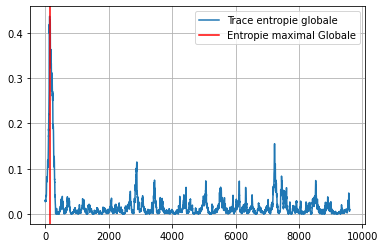

################################
Analyse pour la ville par la méthodelocale : 58
Changement maximum à la position : 347
Nous avons dynamiquement un moyenne de : 367.79661016949154
Avant le changement : [1.0139748699717606,10.914421285459243]
Après le changement : [1.0274179126234326,10.916486693616863]


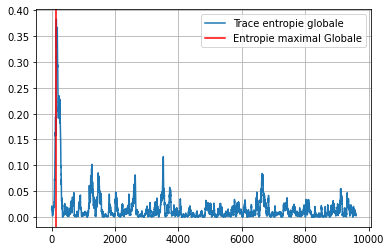

################################
Analyse pour la ville par la méthodelocale : 59
Changement maximum à la position : 346
Nous avons dynamiquement un moyenne de : 367.43333333333334
Avant le changement : [0.9126008946409645,10.876630286380198]
Après le changement : [1.0643915927742584,10.956636380185]


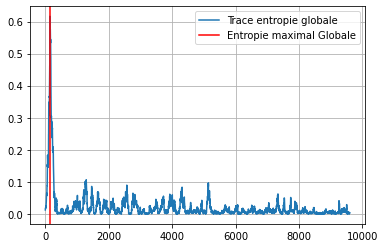

################################
Analyse pour la ville par la méthodelocale : 60
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 367.27868852459017
Avant le changement : [0.9733467020505281,10.928806627158814]
Après le changement : [1.0386819420748996,11.076891684103689]


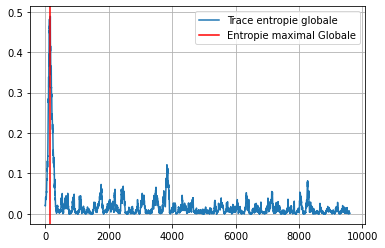

################################
Analyse pour la ville par la méthodelocale : 61
Changement maximum à la position : 343
Nous avons dynamiquement un moyenne de : 366.88709677419354
Avant le changement : [0.9923361691148641,10.877990073735218]
Après le changement : [1.0526407610804056,11.134382215173797]


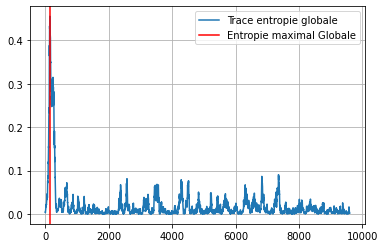

################################
Analyse pour la ville par la méthodelocale : 62
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 366.7142857142857
Avant le changement : [1.0646048596534594,11.07062791340317]
Après le changement : [0.9919262987347847,11.089162149176136]


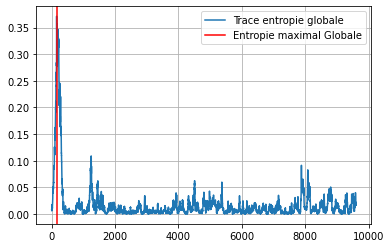

################################
Analyse pour la ville par la méthodelocale : 63
Changement maximum à la position : 357
Nous avons dynamiquement un moyenne de : 366.5625
Avant le changement : [1.010617445082888,11.073588960359084]
Après le changement : [1.1230784387910777,11.079374766297484]


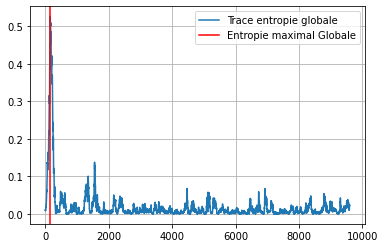

################################
Analyse pour la ville par la méthodelocale : 64
Changement maximum à la position : 351
Nous avons dynamiquement un moyenne de : 366.32307692307694
Avant le changement : [1.0090777887781748,10.995359504054095]
Après le changement : [1.0002541671752385,11.073675381476365]


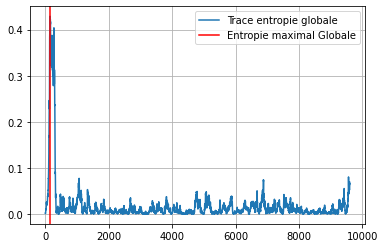

################################
Analyse pour la ville par la méthodelocale : 65
Changement maximum à la position : 344
Nous avons dynamiquement un moyenne de : 365.9848484848485
Avant le changement : [0.9393770591708991,10.921856589078176]
Après le changement : [1.01216513433583,11.128088287580495]


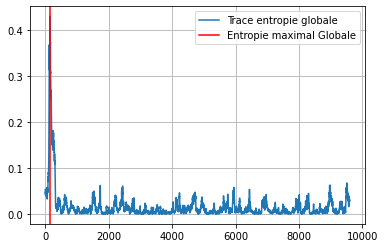

################################
Analyse pour la ville par la méthodelocale : 66
Changement maximum à la position : 440
Nous avons dynamiquement un moyenne de : 367.089552238806
Avant le changement : [0.9621098930435162,11.01668154280863]
Après le changement : [0.971893502557607,10.989163554459141]


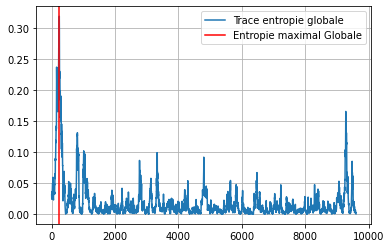

################################
Analyse pour la ville par la méthodelocale : 67
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 366.9264705882353
Avant le changement : [0.9550126414698699,10.99836048926943]
Après le changement : [0.9622112542792971,10.924313204794213]


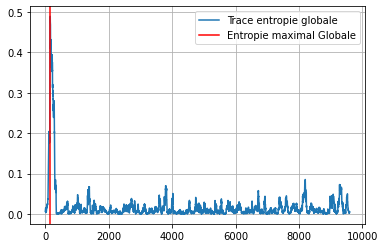

################################
Analyse pour la ville par la méthodelocale : 68
Changement maximum à la position : 359
Nous avons dynamiquement un moyenne de : 366.81159420289856
Avant le changement : [0.9916601960432184,11.033853662870735]
Après le changement : [0.9942139754853194,11.028796907817469]


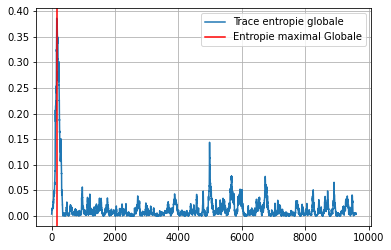

################################
Analyse pour la ville par la méthodelocale : 69
Changement maximum à la position : 352
Nous avons dynamiquement un moyenne de : 366.6
Avant le changement : [0.9803091776559103,10.983075889436536]
Après le changement : [0.9359281637006445,10.96903187098545]


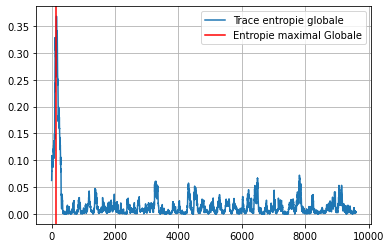

################################
Analyse pour la ville par la méthodelocale : 70
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 366.4366197183099
Avant le changement : [1.05726536916793,11.064179456957126]
Après le changement : [1.0212382687553905,10.988238264142375]


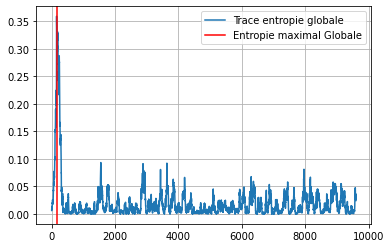

################################
Analyse pour la ville par la méthodelocale : 71
Changement maximum à la position : 337
Nous avons dynamiquement un moyenne de : 366.02777777777777
Avant le changement : [1.035872479793495,11.018119229926096]
Après le changement : [1.0303362600258181,10.979865858653138]


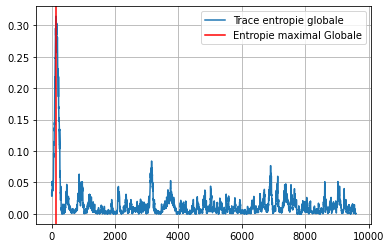

################################
Analyse pour la ville par la méthodelocale : 72
Changement maximum à la position : 403
Nous avons dynamiquement un moyenne de : 366.5342465753425
Avant le changement : [0.9519829024466353,11.011530003014624]
Après le changement : [0.9794990838018306,10.941250682677595]


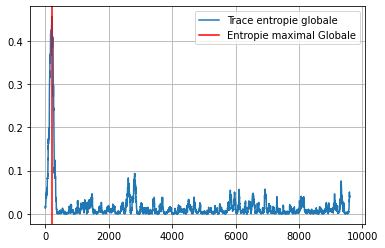

################################
Analyse pour la ville par la méthodelocale : 73
Changement maximum à la position : 369
Nous avons dynamiquement un moyenne de : 366.56756756756755
Avant le changement : [0.98538512572809,10.911053103201354]
Après le changement : [1.0310688412629025,10.914361678763107]


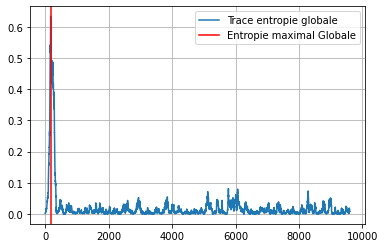

################################
Analyse pour la ville par la méthodelocale : 74
Changement maximum à la position : 367
Nous avons dynamiquement un moyenne de : 366.5733333333333
Avant le changement : [1.0726632587568141,11.030219387099518]
Après le changement : [1.0560271988000356,10.96068544082001]


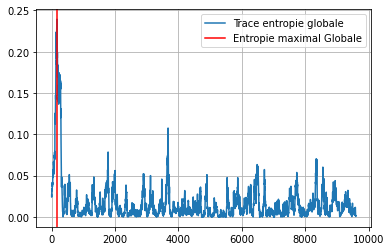

################################
Analyse pour la ville par la méthodelocale : 75
Changement maximum à la position : 338
Nous avons dynamiquement un moyenne de : 366.19736842105266
Avant le changement : [0.9512770181277848,10.92842891191275]
Après le changement : [1.0347752510363004,10.829920044687146]


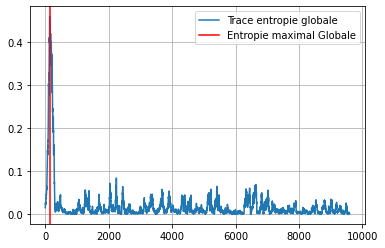

################################
Analyse pour la ville par la méthodelocale : 76
Changement maximum à la position : 364
Nous avons dynamiquement un moyenne de : 366.16883116883116
Avant le changement : [1.012975935979786,10.921674065637045]
Après le changement : [0.9582433248668253,11.028616605872134]


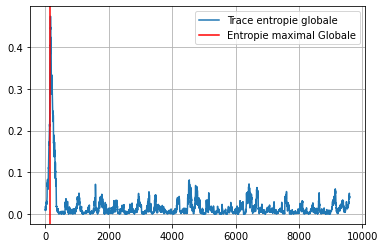

################################
Analyse pour la ville par la méthodelocale : 77
Changement maximum à la position : 355
Nous avons dynamiquement un moyenne de : 366.02564102564105
Avant le changement : [0.9372209484791569,11.031509110092527]
Après le changement : [0.9366801974998873,10.97933791913433]


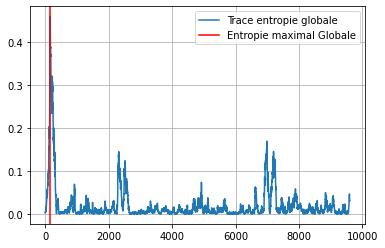

################################
Analyse pour la ville par la méthodelocale : 78
Changement maximum à la position : 375
Nous avons dynamiquement un moyenne de : 366.1392405063291
Avant le changement : [0.9606172975674308,10.961069033124481]
Après le changement : [0.9696147895637748,11.002179088304738]


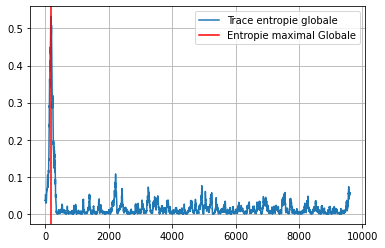

################################
Analyse pour la ville par la méthodelocale : 79
Changement maximum à la position : 361
Nous avons dynamiquement un moyenne de : 366.075
Avant le changement : [0.9449830083772243,11.073610479666204]
Après le changement : [0.9662050075029877,10.928179306761622]


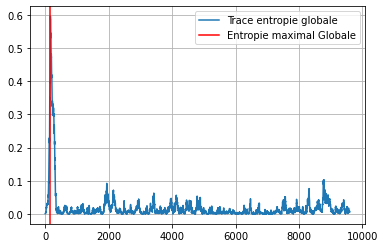

################################
Analyse pour la ville par la méthodelocale : 80
Changement maximum à la position : 378
Nous avons dynamiquement un moyenne de : 366.22222222222223
Avant le changement : [0.9368538364445979,11.03453285364697]
Après le changement : [0.9698633079100895,11.031784346617032]


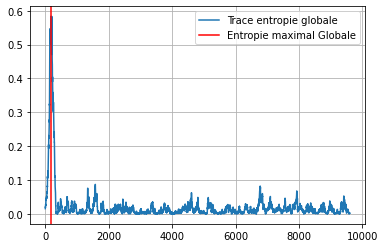

################################
Analyse pour la ville par la méthodelocale : 81
Changement maximum à la position : 350
Nous avons dynamiquement un moyenne de : 366.0243902439024
Avant le changement : [0.9949116953438228,10.977282262040502]
Après le changement : [1.1329560473517093,10.952951986501649]


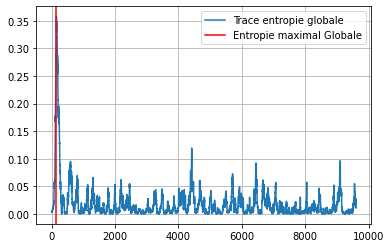

################################
Analyse pour la ville par la méthodelocale : 82
Changement maximum à la position : 390
Nous avons dynamiquement un moyenne de : 366.31325301204816
Avant le changement : [1.069939253666495,11.032634642632564]
Après le changement : [0.9687873251885528,11.012725804531728]


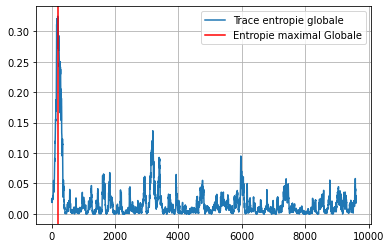

################################
Analyse pour la ville par la méthodelocale : 83
Changement maximum à la position : 359
Nous avons dynamiquement un moyenne de : 366.2261904761905
Avant le changement : [0.9263342124571781,11.016060417334224]
Après le changement : [1.0007166717065183,11.022164338515811]


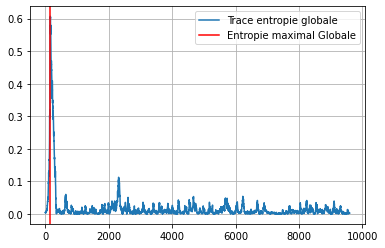

################################
Analyse pour la ville par la méthodelocale : 84
Changement maximum à la position : 359
Nous avons dynamiquement un moyenne de : 366.1411764705882
Avant le changement : [0.999824756320227,10.982373510769786]
Après le changement : [0.9593067329910093,10.979541637470852]


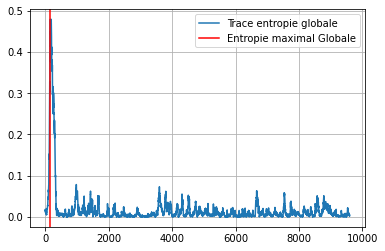

################################
Analyse pour la ville par la méthodelocale : 85
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 366.0232558139535
Avant le changement : [1.0172142811286093,11.058929838723554]
Après le changement : [1.0041747713250804,11.060279761339954]


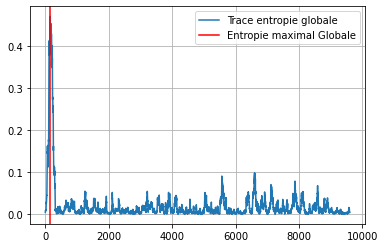

################################
Analyse pour la ville par la méthodelocale : 86
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 365.9310344827586
Avant le changement : [1.0092581939458878,10.983017425177175]
Après le changement : [0.952080200850467,10.895821405577927]


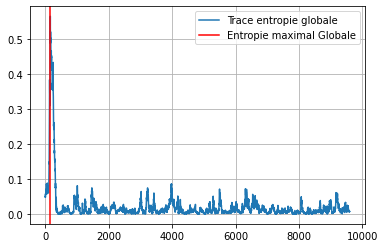

################################
Analyse pour la ville par la méthodelocale : 87
Changement maximum à la position : 393
Nous avons dynamiquement un moyenne de : 366.2386363636364
Avant le changement : [1.1782320537392055,11.141161353243788]
Après le changement : [0.9844949618420321,10.880420404613355]


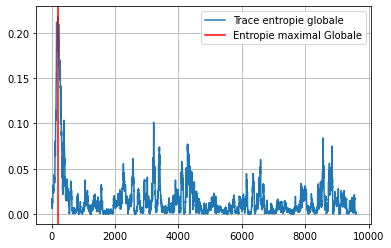

################################
Analyse pour la ville par la méthodelocale : 88
Changement maximum à la position : 376
Nous avons dynamiquement un moyenne de : 366.34831460674155
Avant le changement : [0.9806066944883222,11.093765835251208]
Après le changement : [0.9664251091945978,11.090521687379587]


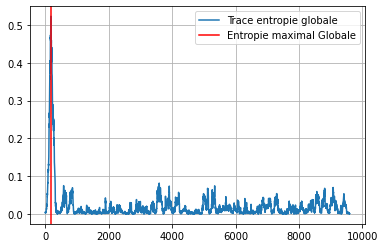

################################
Analyse pour la ville par la méthodelocale : 89
Changement maximum à la position : 358
Nous avons dynamiquement un moyenne de : 366.25555555555553
Avant le changement : [1.0361237590565322,11.155865444007791]
Après le changement : [1.0454005133184794,10.920769398431002]


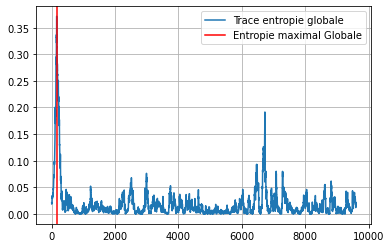

################################
Analyse pour la ville par la méthodelocale : 90
Changement maximum à la position : 343
Nous avons dynamiquement un moyenne de : 366.0
Avant le changement : [0.9879940058659337,10.786495340514762]
Après le changement : [1.028252154842755,11.021740312279318]


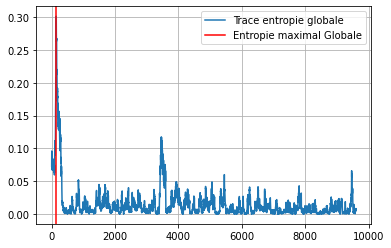

################################
Analyse pour la ville par la méthodelocale : 91
Changement maximum à la position : 376
Nous avons dynamiquement un moyenne de : 366.10869565217394
Avant le changement : [0.995126352865766,10.931256186980653]
Après le changement : [1.0639329335711705,10.952918267066998]


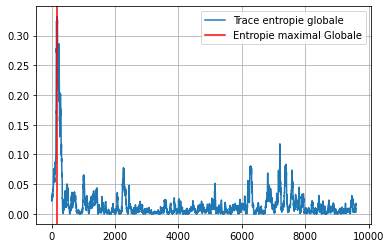

################################
Analyse pour la ville par la méthodelocale : 92
Changement maximum à la position : 352
Nous avons dynamiquement un moyenne de : 365.9569892473118
Avant le changement : [0.9409131909712329,10.926676252310179]
Après le changement : [0.9944416118899646,11.053028910736836]


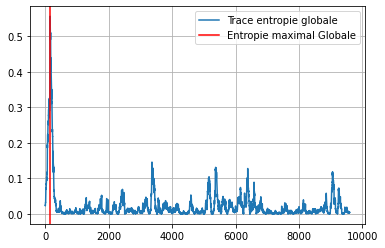

################################
Analyse pour la ville par la méthodelocale : 93
Changement maximum à la position : 362
Nous avons dynamiquement un moyenne de : 365.9148936170213
Avant le changement : [1.0141964684244926,10.946945940405632]
Après le changement : [0.9920693179299535,10.932130941442082]


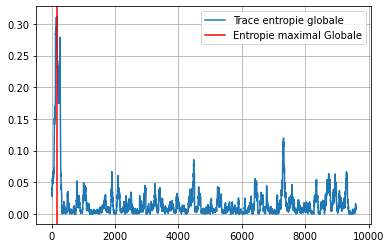

################################
Analyse pour la ville par la méthodelocale : 94
Changement maximum à la position : 340
Nous avons dynamiquement un moyenne de : 365.6421052631579
Avant le changement : [0.8826043111575309,10.926776766229079]
Après le changement : [1.0305447477823382,11.033803899230074]


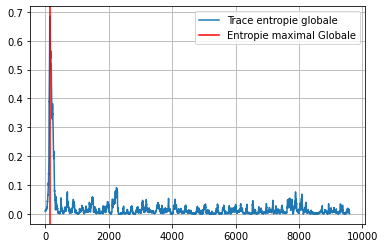

################################
Analyse pour la ville par la méthodelocale : 95
Changement maximum à la position : 360
Nous avons dynamiquement un moyenne de : 365.5833333333333
Avant le changement : [0.9437382115671376,11.014564160390348]
Après le changement : [0.97172023510947,10.87800002755394]


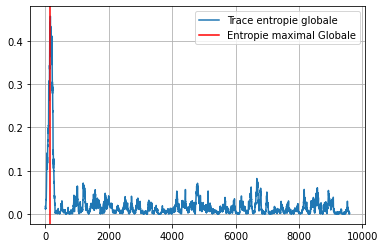

################################
Analyse pour la ville par la méthodelocale : 96
Changement maximum à la position : 360
Nous avons dynamiquement un moyenne de : 365.5257731958763
Avant le changement : [0.9854864026203503,11.076572238264903]
Après le changement : [0.9724870576276926,11.021439092624213]


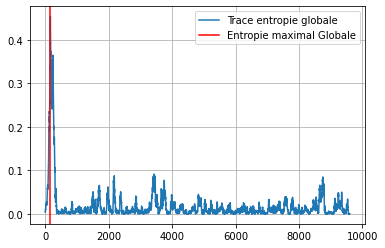

################################
Analyse pour la ville par la méthodelocale : 97
Changement maximum à la position : 373
Nous avons dynamiquement un moyenne de : 365.6020408163265
Avant le changement : [1.0148291089622365,11.11167777061317]
Après le changement : [0.9915073143979158,10.922163482847395]


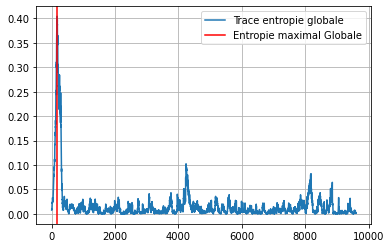

################################
Analyse pour la ville par la méthodelocale : 98
Changement maximum à la position : 341
Nous avons dynamiquement un moyenne de : 365.35353535353534
Avant le changement : [1.0279465721871284,10.966704724178113]
Après le changement : [0.9887975120516678,10.933486453762162]


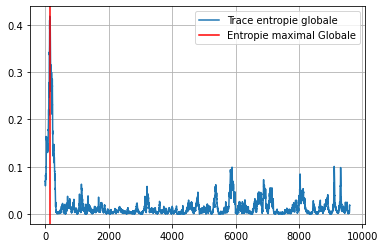

################################
Analyse pour la ville par la méthodelocale : 99
Changement maximum à la position : 356
Nous avons dynamiquement un moyenne de : 365.26
Avant le changement : [0.9924865277655942,10.897667242412316]
Après le changement : [0.9712881375419004,10.941352016719042]


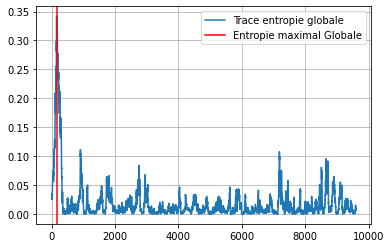

################################
################################END################################


In [ ]:
entropie(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1, method = "locale")

Nous pouvons voir un résultat beaucoup plus proche du modèle théorique. Nous sommes en moyenne sur les 100 villes à **365.26**. 

L'approche locale est alors beaucoup plus intéressante pour la précision des données. 


Il est alors intéréssant de comparer les deux méthodes, que ce soit dans le déroulement de l'analyse, ou dans les valeurs obtenus.

## **Méthode d'entropie relative Globale** 🆚 **Locale** 

Pour une meilleure visualisation des données, j'ai décidé de réduire la taille de la fenêtre d'analyse des données. 

J'ai donc utilisé les mêmes paramètres que dans les exemples précédents, mais avec une fenêtre de 200.

In [ ]:
def entropie_versus(mat, file_name, N, fenetre, step):
    Entropie_totale_globale = []
    Entropie_totale_locale = []

    theoretical_result = 365

    for city in range(len(mat[file_name])):

        # Initialisation des tableaux pour l'entropie global
        Entropie_globale = []
        meanArrayGlobaleAvant = []
        meanArrayGlobaleApres = []
        stdArrayGlobaleAvant = []
        stdArrayGlobaleApres = []

        # Initialisation des tableaux pour l'entropie local
        Entropie_locale = []
        meanArrayLocaleAvant = []
        meanArrayLocaleApres = []
        stdArrayLocaleAvant = []
        stdArrayLocaleApres = []

        for element in range(fenetre, N-fenetre, step):

            #Traitement pour l'entropie Globale
            X1 = mat[file_name][city][0:element-1]
            X2 = mat[file_name][city][element+1:N]

            mu1 = np.mean(X1)
            mu2 = np.mean(X2)
            si1 = np.std(X1)
            si2 = np.std(X2)

            meanArrayGlobaleAvant.append(mu1)
            meanArrayGlobaleApres.append(mu2)
            stdArrayGlobaleAvant.append(si1)
            stdArrayGlobaleApres.append(si2)

            ent = ((1 / 2) * ((mu1 - mu2) ** 2) * (1 / ((si1 ** 2) + (si2 ** 2))) + (1 / 2) * (((si2 ** 2) / (si1 ** 2)) + ((si1 ** 2) / (si2 ** 2))) - 1)

            Entropie_globale.append(ent)
            
            #Traitement pour l'entropie Locale
            X1 = mat[file_name][city][element - fenetre:element-1]
            X2 = mat[file_name][city][element:element + fenetre]

            mu1 = np.mean(X1)
            mu2 = np.mean(X2)
            si1 = np.std(X1)
            si2 = np.std(X2)

            meanArrayLocaleAvant.append(mu1)
            meanArrayLocaleApres.append(mu2)
            stdArrayLocaleAvant.append(si1)
            stdArrayLocaleApres.append(si2)

            ent = ((1 / 2) * ((mu1 - mu2) ** 2) * (1 / ((si1 ** 2) + (si2 ** 2))) + (1 / 2) * (((si2 ** 2) / (si1 ** 2)) + ((si1 ** 2) / (si2 ** 2))) - 1)

            Entropie_locale.append(ent)

        global_index_locale = Entropie_locale.index(max(Entropie_locale)) * step + fenetre
        global_index_globale = Entropie_globale.index(max(Entropie_globale)) * step + fenetre

        Entropie_totale_locale.append(global_index_locale)
        Entropie_totale_globale.append(global_index_globale)
        print("################################")
        print("Paramètre des lois correspondants pour la ville :" + str(city))
        print("Avec une approche locale : " + str(global_index_locale))
        print("Avec une approche globale : " + str(global_index_globale))
        plt.plot(Entropie_globale, label="Trace entropie globale") 
        plt.plot(Entropie_locale, label="Trace entropie locale")

        plt.axvline(x=(global_index_locale - 200), color="red", label="Entropie maximal Locale")
        plt.axvline(x=(global_index_globale - 200), color="black", label="Entropie maximal Globale")
        plt.grid()
        plt.legend()
        plt.show() 

    print("################################ END ################################")
    print("Entropie totale locale : " + str(np.mean(Entropie_totale_locale)))
    print("Entropie totale globale : " + str(np.mean(Entropie_totale_globale)))

################################
Paramètre des lois correspondants pour la ville :0
Avec une approche locale : 356
Avec une approche globale : 342


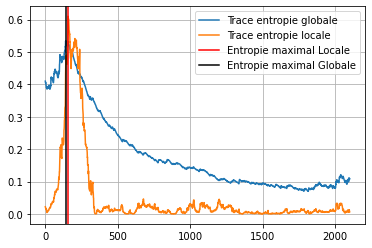

################################
Paramètre des lois correspondants pour la ville :1
Avec une approche locale : 356
Avec une approche globale : 275


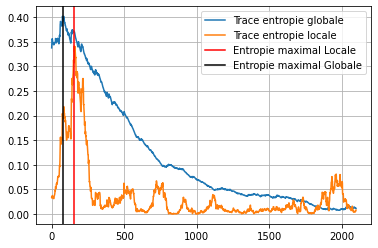

################################
Paramètre des lois correspondants pour la ville :2
Avec une approche locale : 354
Avec une approche globale : 326


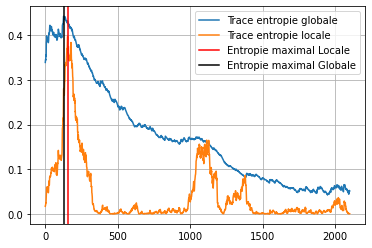

################################
Paramètre des lois correspondants pour la ville :3
Avec une approche locale : 351
Avec une approche globale : 350


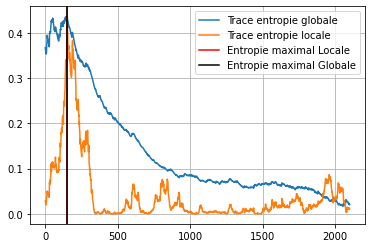

################################
Paramètre des lois correspondants pour la ville :4
Avec une approche locale : 359
Avec une approche globale : 349


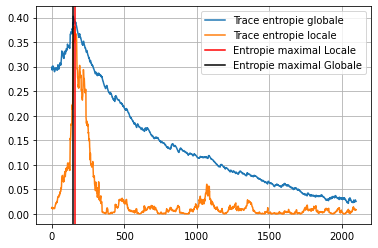

################################
Paramètre des lois correspondants pour la ville :5
Avec une approche locale : 360
Avec une approche globale : 357


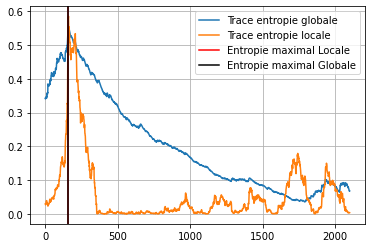

################################
Paramètre des lois correspondants pour la ville :6
Avec une approche locale : 375
Avec une approche globale : 358


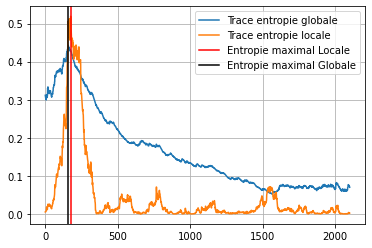

################################
Paramètre des lois correspondants pour la ville :7
Avec une approche locale : 373
Avec une approche globale : 351


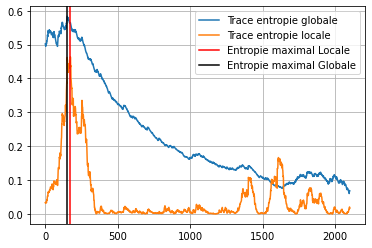

################################
Paramètre des lois correspondants pour la ville :8
Avec une approche locale : 355
Avec une approche globale : 354


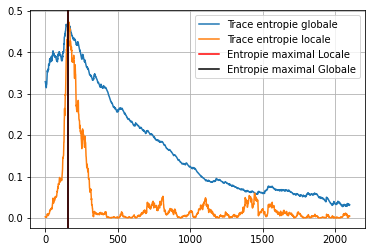

################################
Paramètre des lois correspondants pour la ville :9
Avec une approche locale : 414
Avec une approche globale : 349


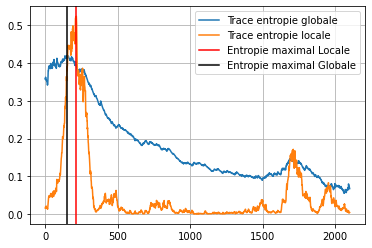

################################
Paramètre des lois correspondants pour la ville :10
Avec une approche locale : 358
Avec une approche globale : 347


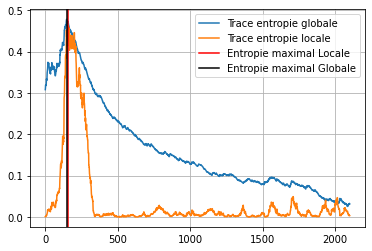

################################
Paramètre des lois correspondants pour la ville :11
Avec une approche locale : 358
Avec une approche globale : 357


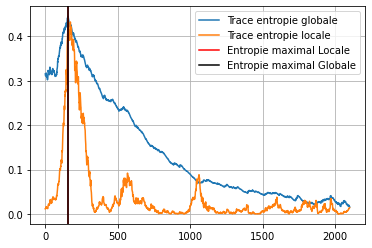

################################
Paramètre des lois correspondants pour la ville :12
Avec une approche locale : 363
Avec une approche globale : 356


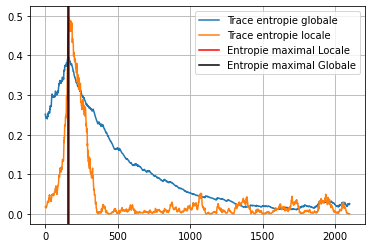

################################
Paramètre des lois correspondants pour la ville :13
Avec une approche locale : 375
Avec une approche globale : 347


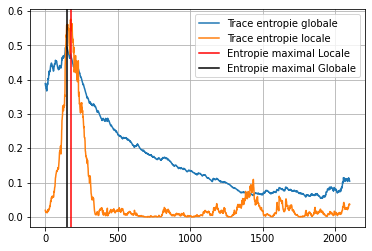

################################
Paramètre des lois correspondants pour la ville :14
Avec une approche locale : 353
Avec une approche globale : 348


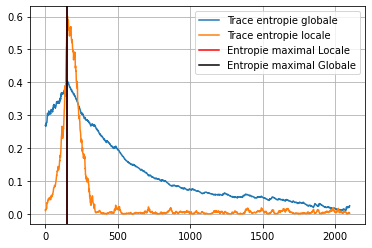

################################
Paramètre des lois correspondants pour la ville :15
Avec une approche locale : 356
Avec une approche globale : 309


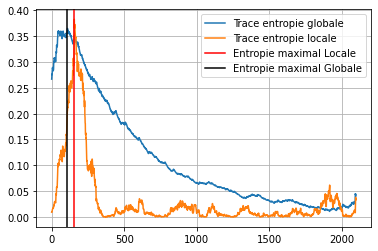

################################
Paramètre des lois correspondants pour la ville :16
Avec une approche locale : 367
Avec une approche globale : 357


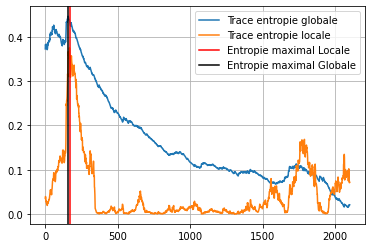

################################
Paramètre des lois correspondants pour la ville :17
Avec une approche locale : 370
Avec une approche globale : 370


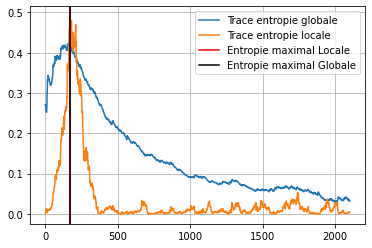

################################
Paramètre des lois correspondants pour la ville :18
Avec une approche locale : 357
Avec une approche globale : 356


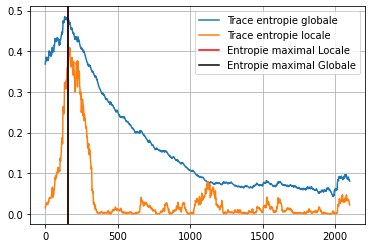

################################
Paramètre des lois correspondants pour la ville :19
Avec une approche locale : 358
Avec une approche globale : 358


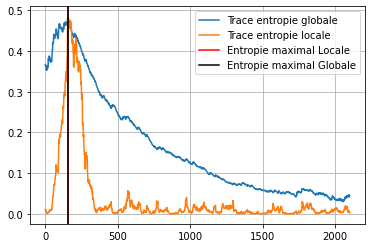

################################
Paramètre des lois correspondants pour la ville :20
Avec une approche locale : 371
Avec une approche globale : 200


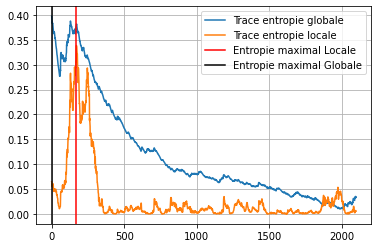

################################
Paramètre des lois correspondants pour la ville :21
Avec une approche locale : 356
Avec une approche globale : 354


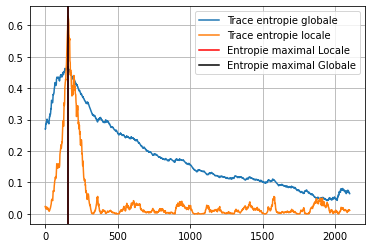

################################
Paramètre des lois correspondants pour la ville :22
Avec une approche locale : 381
Avec une approche globale : 357


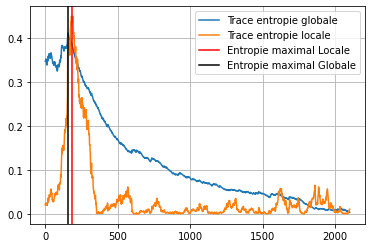

################################
Paramètre des lois correspondants pour la ville :23
Avec une approche locale : 368
Avec une approche globale : 266


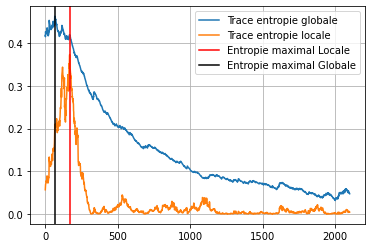

################################
Paramètre des lois correspondants pour la ville :24
Avec une approche locale : 357
Avec une approche globale : 356


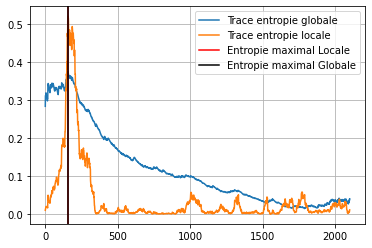

################################
Paramètre des lois correspondants pour la ville :25
Avec une approche locale : 384
Avec une approche globale : 363


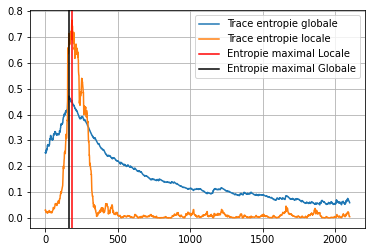

################################
Paramètre des lois correspondants pour la ville :26
Avec une approche locale : 411
Avec une approche globale : 344


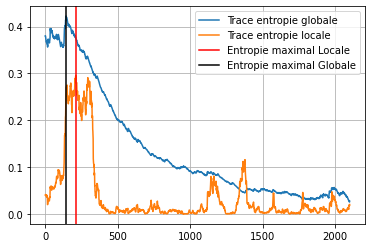

################################
Paramètre des lois correspondants pour la ville :27
Avec une approche locale : 437
Avec une approche globale : 351


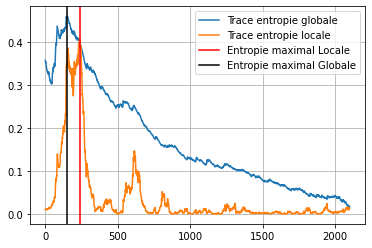

################################
Paramètre des lois correspondants pour la ville :28
Avec une approche locale : 360
Avec une approche globale : 361


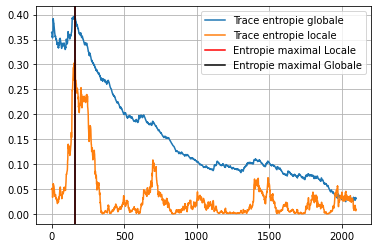

################################
Paramètre des lois correspondants pour la ville :29
Avec une approche locale : 357
Avec une approche globale : 358


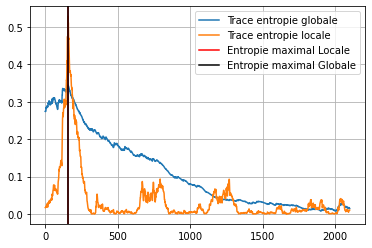

################################
Paramètre des lois correspondants pour la ville :30
Avec une approche locale : 388
Avec une approche globale : 348


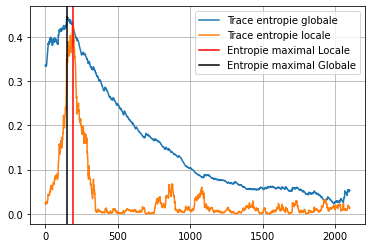

################################
Paramètre des lois correspondants pour la ville :31
Avec une approche locale : 355
Avec une approche globale : 354


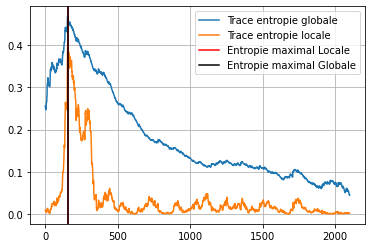

################################
Paramètre des lois correspondants pour la ville :32
Avec une approche locale : 361
Avec une approche globale : 358


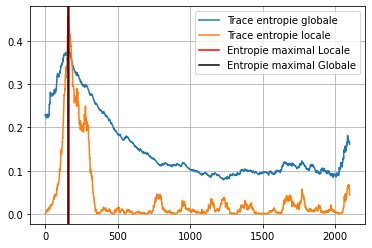

################################
Paramètre des lois correspondants pour la ville :33
Avec une approche locale : 363
Avec une approche globale : 360


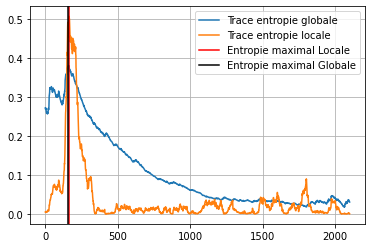

################################
Paramètre des lois correspondants pour la ville :34
Avec une approche locale : 361
Avec une approche globale : 212


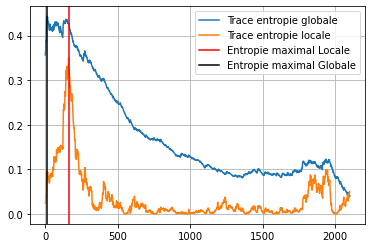

################################
Paramètre des lois correspondants pour la ville :35
Avec une approche locale : 355
Avec une approche globale : 355


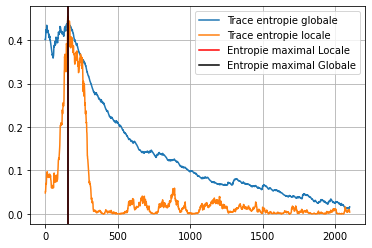

################################
Paramètre des lois correspondants pour la ville :36
Avec une approche locale : 428
Avec une approche globale : 346


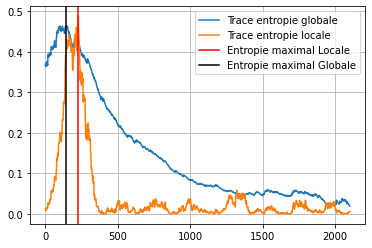

################################
Paramètre des lois correspondants pour la ville :37
Avec une approche locale : 355
Avec une approche globale : 355


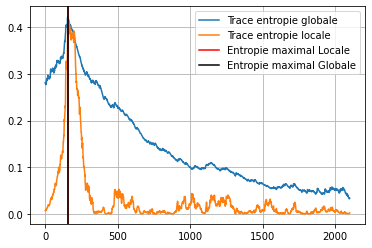

################################
Paramètre des lois correspondants pour la ville :38
Avec une approche locale : 357
Avec une approche globale : 357


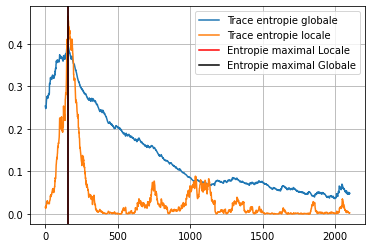

################################
Paramètre des lois correspondants pour la ville :39
Avec une approche locale : 451
Avec une approche globale : 358


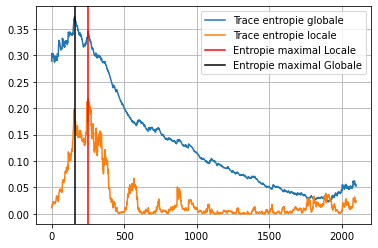

################################
Paramètre des lois correspondants pour la ville :40
Avec une approche locale : 372
Avec une approche globale : 337


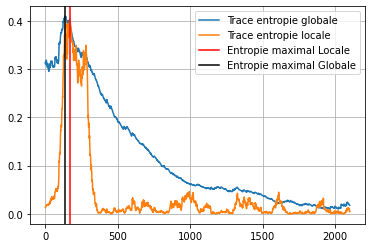

################################
Paramètre des lois correspondants pour la ville :41
Avec une approche locale : 357
Avec une approche globale : 355


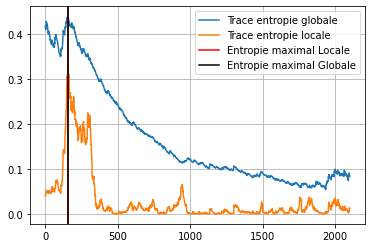

################################
Paramètre des lois correspondants pour la ville :42
Avec une approche locale : 355
Avec une approche globale : 317


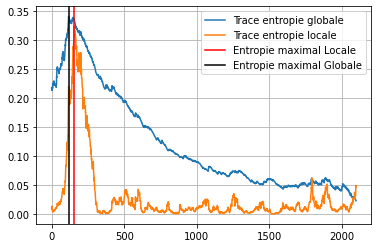

################################
Paramètre des lois correspondants pour la ville :43
Avec une approche locale : 358
Avec une approche globale : 211


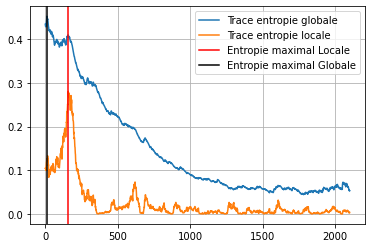

################################
Paramètre des lois correspondants pour la ville :44
Avec une approche locale : 372
Avec une approche globale : 361


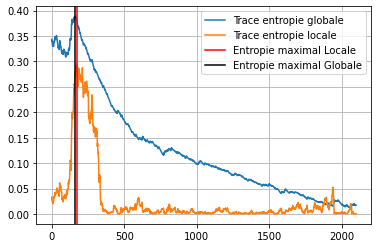

################################
Paramètre des lois correspondants pour la ville :45
Avec une approche locale : 350
Avec une approche globale : 349


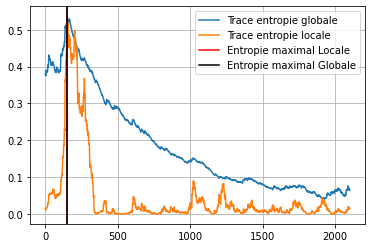

################################
Paramètre des lois correspondants pour la ville :46
Avec une approche locale : 348
Avec une approche globale : 348


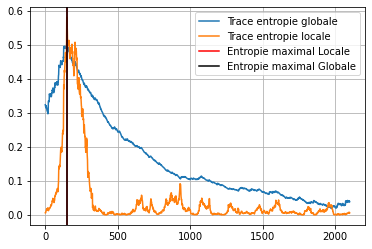

################################
Paramètre des lois correspondants pour la ville :47
Avec une approche locale : 370
Avec une approche globale : 345


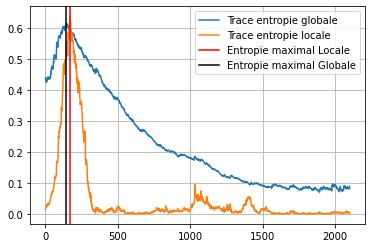

################################
Paramètre des lois correspondants pour la ville :48
Avec une approche locale : 390
Avec une approche globale : 298


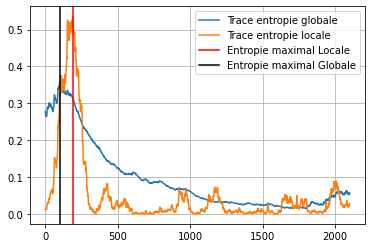

################################
Paramètre des lois correspondants pour la ville :49
Avec une approche locale : 409
Avec une approche globale : 359


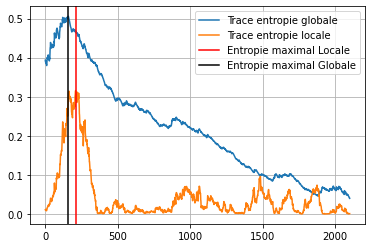

################################
Paramètre des lois correspondants pour la ville :50
Avec une approche locale : 354
Avec une approche globale : 347


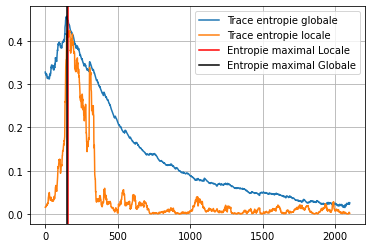

################################
Paramètre des lois correspondants pour la ville :51
Avec une approche locale : 360
Avec une approche globale : 325


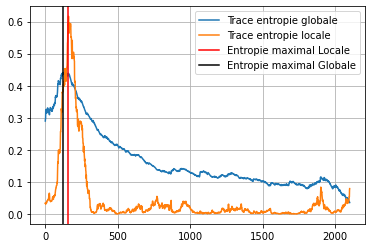

################################
Paramètre des lois correspondants pour la ville :52
Avec une approche locale : 340
Avec une approche globale : 338


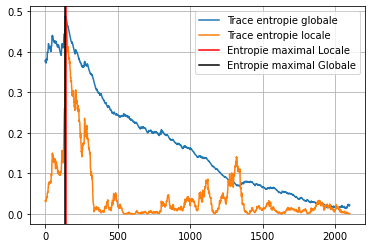

################################
Paramètre des lois correspondants pour la ville :53
Avec une approche locale : 357
Avec une approche globale : 355


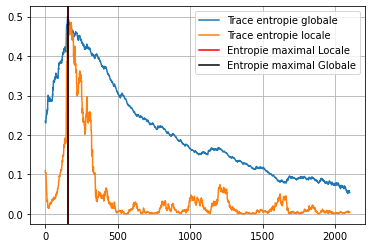

################################
Paramètre des lois correspondants pour la ville :54
Avec une approche locale : 354
Avec une approche globale : 352


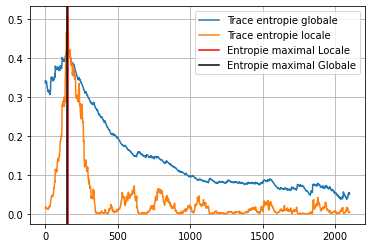

################################
Paramètre des lois correspondants pour la ville :55
Avec une approche locale : 380
Avec une approche globale : 341


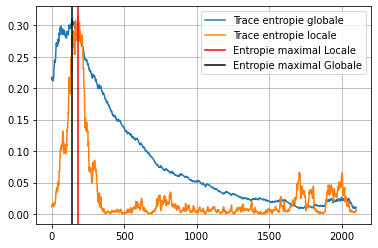

################################
Paramètre des lois correspondants pour la ville :56
Avec une approche locale : 366
Avec une approche globale : 341


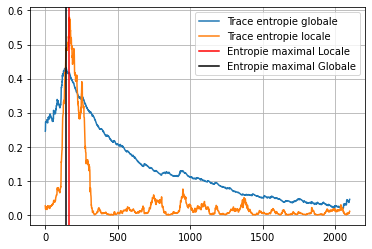

################################
Paramètre des lois correspondants pour la ville :57
Avec une approche locale : 337
Avec une approche globale : 325


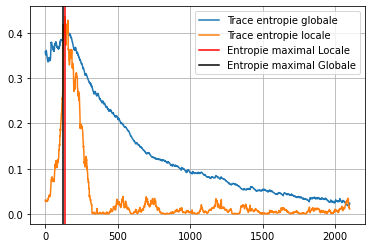

################################
Paramètre des lois correspondants pour la ville :58
Avec une approche locale : 347
Avec une approche globale : 347


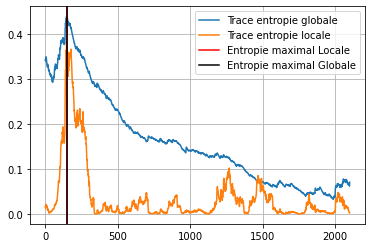

################################
Paramètre des lois correspondants pour la ville :59
Avec une approche locale : 346
Avec une approche globale : 345


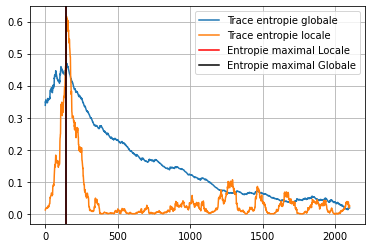

################################
Paramètre des lois correspondants pour la ville :60
Avec une approche locale : 358
Avec une approche globale : 324


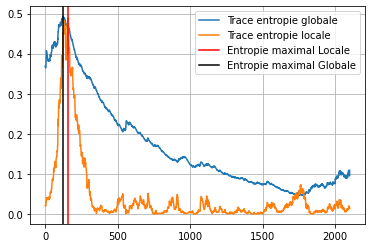

################################
Paramètre des lois correspondants pour la ville :61
Avec une approche locale : 343
Avec une approche globale : 335


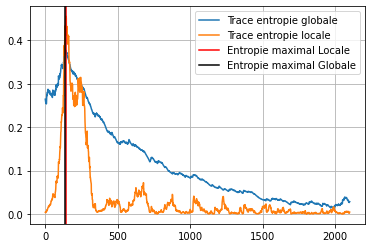

################################
Paramètre des lois correspondants pour la ville :62
Avec une approche locale : 356
Avec une approche globale : 357


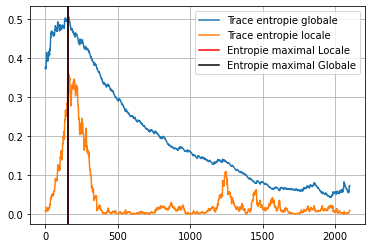

################################
Paramètre des lois correspondants pour la ville :63
Avec une approche locale : 357
Avec une approche globale : 344


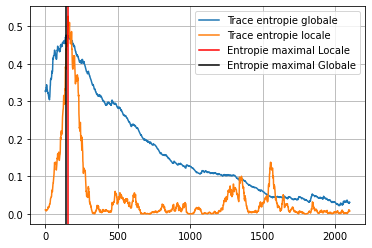

################################
Paramètre des lois correspondants pour la ville :64
Avec une approche locale : 351
Avec une approche globale : 335


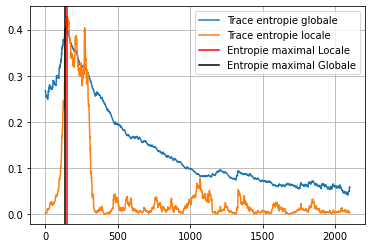

################################
Paramètre des lois correspondants pour la ville :65
Avec une approche locale : 344
Avec une approche globale : 344


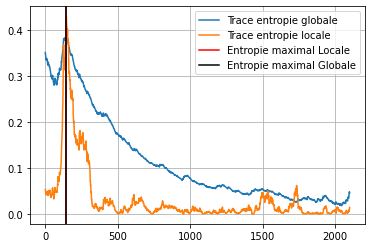

################################
Paramètre des lois correspondants pour la ville :66
Avec une approche locale : 440
Avec une approche globale : 367


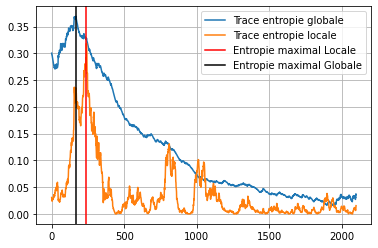

################################
Paramètre des lois correspondants pour la ville :67
Avec une approche locale : 356
Avec une approche globale : 353


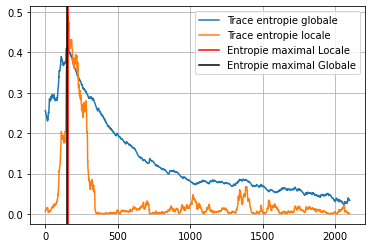

################################
Paramètre des lois correspondants pour la ville :68
Avec une approche locale : 359
Avec une approche globale : 360


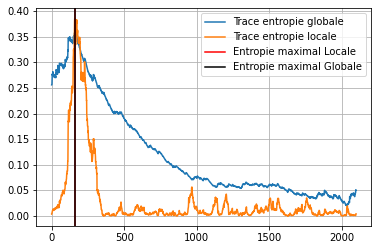

################################
Paramètre des lois correspondants pour la ville :69
Avec une approche locale : 352
Avec une approche globale : 209


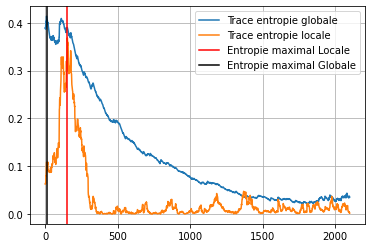

################################
Paramètre des lois correspondants pour la ville :70
Avec une approche locale : 355
Avec une approche globale : 356


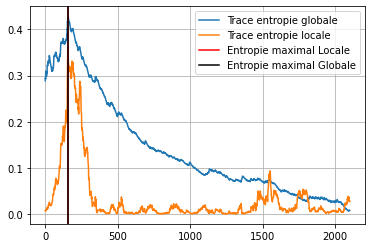

################################
Paramètre des lois correspondants pour la ville :71
Avec une approche locale : 337
Avec une approche globale : 318


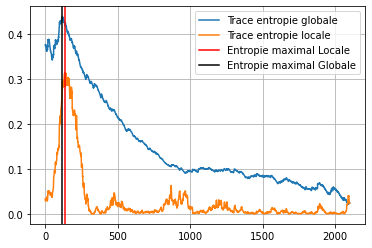

################################
Paramètre des lois correspondants pour la ville :72
Avec une approche locale : 403
Avec une approche globale : 350


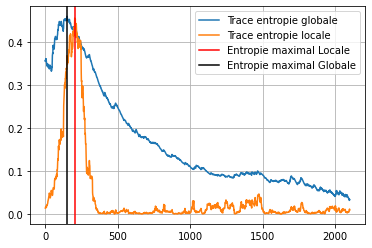

################################
Paramètre des lois correspondants pour la ville :73
Avec une approche locale : 369
Avec une approche globale : 369


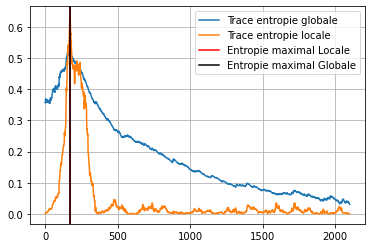

################################
Paramètre des lois correspondants pour la ville :74
Avec une approche locale : 367
Avec une approche globale : 330


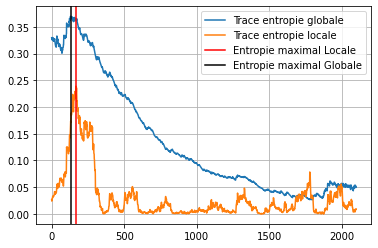

################################
Paramètre des lois correspondants pour la ville :75
Avec une approche locale : 338
Avec une approche globale : 301


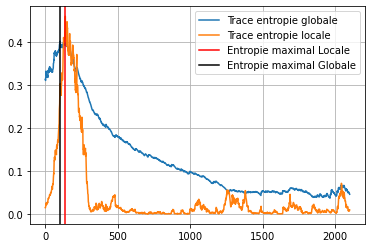

################################
Paramètre des lois correspondants pour la ville :76
Avec une approche locale : 364
Avec une approche globale : 364


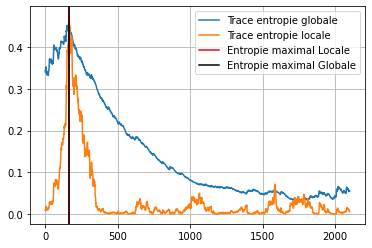

################################
Paramètre des lois correspondants pour la ville :77
Avec une approche locale : 355
Avec une approche globale : 350


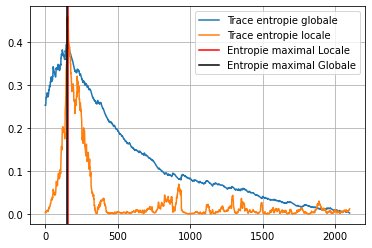

################################
Paramètre des lois correspondants pour la ville :78
Avec une approche locale : 375
Avec une approche globale : 334


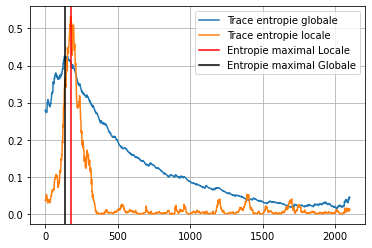

################################
Paramètre des lois correspondants pour la ville :79
Avec une approche locale : 361
Avec une approche globale : 360


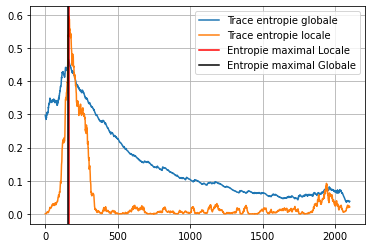

################################
Paramètre des lois correspondants pour la ville :80
Avec une approche locale : 378
Avec une approche globale : 344


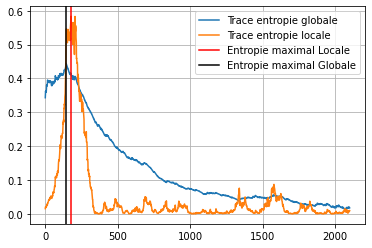

################################
Paramètre des lois correspondants pour la ville :81
Avec une approche locale : 350
Avec une approche globale : 348


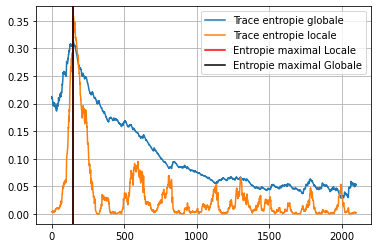

################################
Paramètre des lois correspondants pour la ville :82
Avec une approche locale : 390
Avec une approche globale : 359


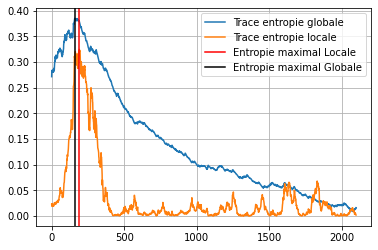

################################
Paramètre des lois correspondants pour la ville :83
Avec une approche locale : 359
Avec une approche globale : 355


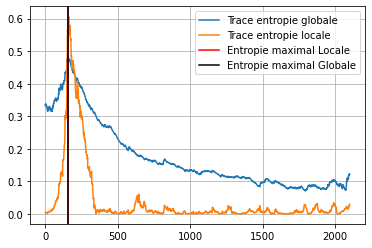

################################
Paramètre des lois correspondants pour la ville :84
Avec une approche locale : 359
Avec une approche globale : 355


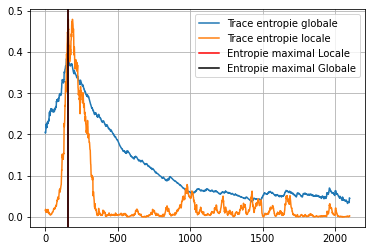

################################
Paramètre des lois correspondants pour la ville :85
Avec une approche locale : 356
Avec une approche globale : 319


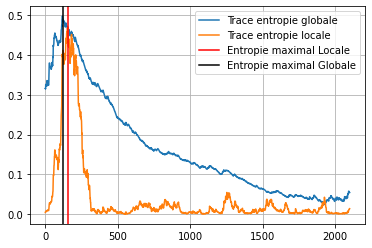

################################
Paramètre des lois correspondants pour la ville :86
Avec une approche locale : 358
Avec une approche globale : 357


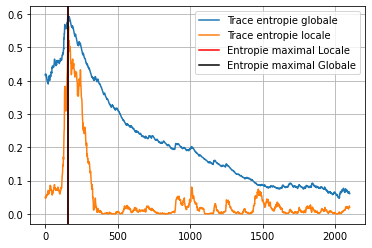

################################
Paramètre des lois correspondants pour la ville :87
Avec une approche locale : 393
Avec une approche globale : 355


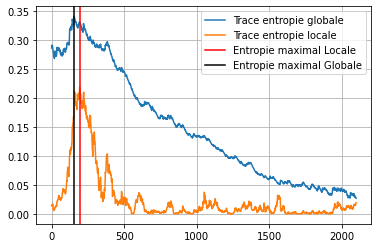

################################
Paramètre des lois correspondants pour la ville :88
Avec une approche locale : 376
Avec une approche globale : 360


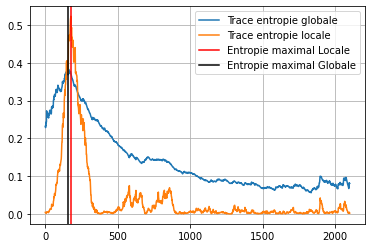

################################
Paramètre des lois correspondants pour la ville :89
Avec une approche locale : 358
Avec une approche globale : 349


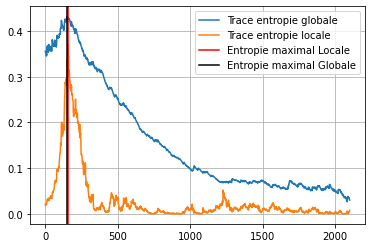

################################
Paramètre des lois correspondants pour la ville :90
Avec une approche locale : 343
Avec une approche globale : 204


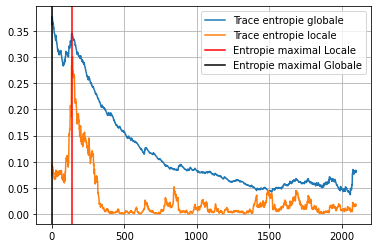

################################
Paramètre des lois correspondants pour la ville :91
Avec une approche locale : 376
Avec une approche globale : 355


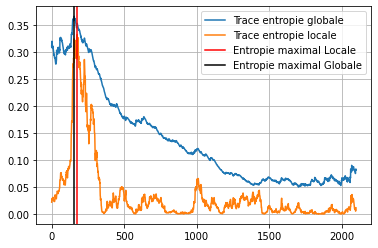

################################
Paramètre des lois correspondants pour la ville :92
Avec une approche locale : 352
Avec une approche globale : 349


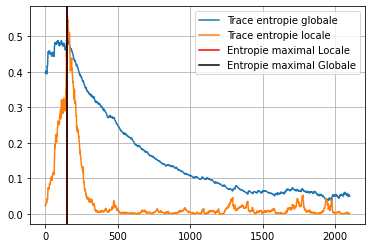

################################
Paramètre des lois correspondants pour la ville :93
Avec une approche locale : 362
Avec une approche globale : 327


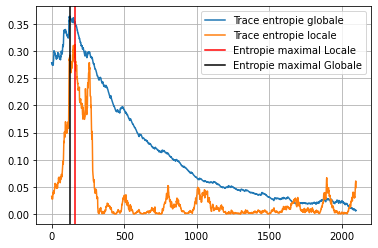

################################
Paramètre des lois correspondants pour la ville :94
Avec une approche locale : 340
Avec une approche globale : 339


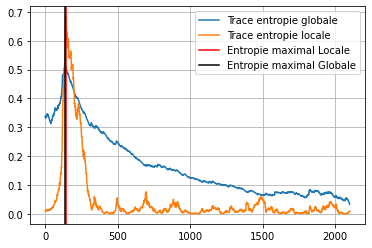

################################
Paramètre des lois correspondants pour la ville :95
Avec une approche locale : 360
Avec une approche globale : 244


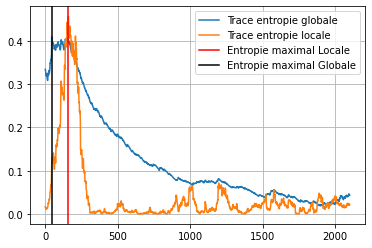

################################
Paramètre des lois correspondants pour la ville :96
Avec une approche locale : 360
Avec une approche globale : 355


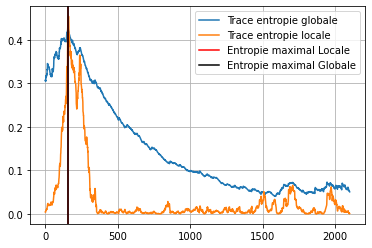

################################
Paramètre des lois correspondants pour la ville :97
Avec une approche locale : 373
Avec une approche globale : 371


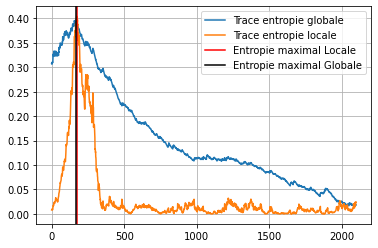

################################
Paramètre des lois correspondants pour la ville :98
Avec une approche locale : 341
Avec une approche globale : 231


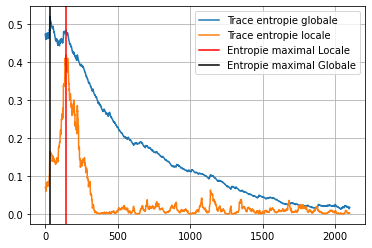

################################
Paramètre des lois correspondants pour la ville :99
Avec une approche locale : 356
Avec une approche globale : 311


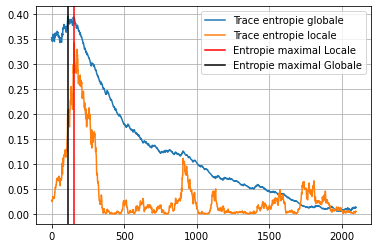

################################ END ################################
Entropie totale locale : 365.26
Entropie totale globale : 336.72


In [ ]:
entropie_versus(mat = mat_pluv, file_name = 'X_pluv', N = 2500, fenetre = 200, step = 1)

Nous pouvons alors voir qu'avec le calcul de l'entropie relative, les résultats sont proches. Globalement, les deux méthodes répondent aux besoins du traitement. 

Pour le traitement sur les 100 villes et sur l'ensemble des valeurs, nous avons les données suivantes :    

```
Pour ma méthode locale : 365.26
Pour la méthode globale : 336.72
```

Sachant que nous avons une valeur théorique à 365, la méthode par approche locale est plus précise.

En effet, nous avons une meilleure précisions en analysant uniquement des petites parties des données avec l'aide la méthode locale. 


# **Exercice 4️ : Analyse globale par maximum de vraisemblance**
---

Nous utilisons une analyse globale par analyse de maximum de vraisemblance avec les différents paramètres et objets
*   **'X_pluv.mat'** le fichier comprennant l'ensemble des informations sur chaque ville
*   **N** qui représente le nombre de valeurs pour chaque ville
*   l'attribut **fenetre** qui représente la taille de l'échantillon étudié 
*   l'attribut **step** qui est le pas de recherche, plus le pas sera faible pour les traitements seront importants et donc lourd. 

Pour déterminer le maximum de vraisemblance sous format globale nous allons utiliser le système suivant :

**Un intervale d'étude :**

```
X1 = mat["X_pluv"][city][0:element-1]
X2 = mat["X_pluv"][city][element+1:N]
```

**Des paramètres d'études :**

```
N = 10000 # Le nombre de valeur pour chaque pays
fenetre = 200 # La taille de la fenêtre pour avoir une analyse avec un nombre de valeur adéquant
step = 1 # La réduction du step au minimum pour avoir le traitement le plus large possible
```

**Un calcul de maximum de vraisemblance :** 



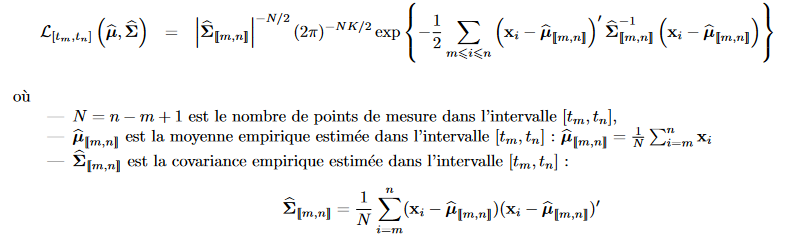

**Sous un intervale** 🔽

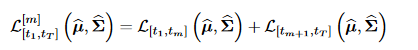

**Comprendre les valeurs et les changements :**

Pour comprendre la nature de la modification des valeurs via l'analyse globale, il est possible de comparer la variance ainsi que la moyenne pour chaque ville. 

Via cette analyse, nous allons voir si le changement porte sur un fort changement de variance ou un fort changement de moyenne. 

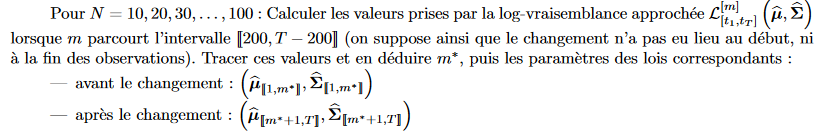


In [ ]:
def vraissemblance(mat, file_name, N, fenetre, step, method, debug = False):

    Vraisemblance_totale = []
    for city in range(len(mat[file_name])):

        Vraisemblance = []
        for element in range(fenetre, N-fenetre, step):

            if(method == "globale"):
              X1 = mat[file_name][city][0:element-1]
              X2 = mat[file_name][city][element+1:N]

            if(method == "locale"):
              X1 = mat[file_name][city][element - fenetre:element-1]
              X2 = mat[file_name][city][element:element + fenetre]

            si1 = np.std(X1)
            si2 = np.std(X2)

            N1 = len(X1)
            N2 = len(X2)

            vraissemblance = -(N1/2)*(1+math.log(2*math.pi*(si1**2))) - (N2/2) * (1+math.log(2*math.pi*(si2**2)))

            Vraisemblance.append(vraissemblance)

        pos = Vraisemblance.index(max(Vraisemblance)) * step + fenetre
        Vraisemblance_totale.append(pos)

        if(debug == True):
           print("Pour la ville " + str(city) + " nous avons " + str(pos))  

    print("En moyenne, pour les 100 villes, nous avons : " + str(np.mean(Vraisemblance_totale)))


In [ ]:
vraissemblance(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1, method = "globale", debug = True)

Pour la ville 0 nous avons 354
Pour la ville 1 nous avons 354
Pour la ville 2 nous avons 352
Pour la ville 3 nous avons 348
Pour la ville 4 nous avons 347
Pour la ville 5 nous avons 355
Pour la ville 6 nous avons 355
Pour la ville 7 nous avons 350
Pour la ville 8 nous avons 354
Pour la ville 9 nous avons 356
Pour la ville 10 nous avons 355
Pour la ville 11 nous avons 355
Pour la ville 12 nous avons 354
Pour la ville 13 nous avons 351
Pour la ville 14 nous avons 356
Pour la ville 15 nous avons 355
Pour la ville 16 nous avons 355
Pour la ville 17 nous avons 368
Pour la ville 18 nous avons 355
Pour la ville 19 nous avons 357
Pour la ville 20 nous avons 365
Pour la ville 21 nous avons 354
Pour la ville 22 nous avons 354
Pour la ville 23 nous avons 365
Pour la ville 24 nous avons 355
Pour la ville 25 nous avons 354
Pour la ville 26 nous avons 348
Pour la ville 27 nous avons 353
Pour la ville 28 nous avons 359
Pour la ville 29 nous avons 356
Pour la ville 30 nous avons 346
Pour la ville 31 n

Grâce au maximum de vraisemblance par l'analyse globale, nous pouvons une nouvelle fois voir des résultats très proche du résultat théorique. 

Nous avons pour résultat sur les 100 villes, nous avons une moyenne de :

```
352.56
```

Nous sommes donc proche du résultat théorique qui est environ de **355**, l'utilisation de la méthode de vraisemblance par méthode globale est donc valide.

# **Exercice 5️ : Analyse locale par maximum de vraisemblance**
---


Nous utilisons une analyse locale par analyse de maximum de vraisemblance avec les différents paramètres et objets
*   **'X_pluv.mat'** le fichier comprennant l'ensemble des informations sur chaque ville
*   **N** qui représente le nombre de valeurs pour chaque ville
*   l'attribut **fenetre** qui représente la taille de l'échantillon étudié 
*   l'attribut **step** qui est le pas de recherche, plus le pas sera faible pour les traitements seront importants et donc lourd. 

Pour déterminer le maximum de vraisemblance sous format locale nous allons utiliser le système suivant :

**Un intervale d'étude :**

```
X1 = mat["X_pluv"][city][element - fenetre:element-1]
X2 = mat["X_pluv"][city][element:element + fenetre]
```

**Des paramètres d'études :**

```
N = 10000 # Le nombre de valeur pour chaque pays
fenetre = 200 # La taille de la fenêtre pour avoir une analyse avec un nombre de valeur adéquant
step = 1 # La réduction du step au minimum pour avoir le traitement le plus large possible
```

**Un calcul de maximum de vraisemblance :** 



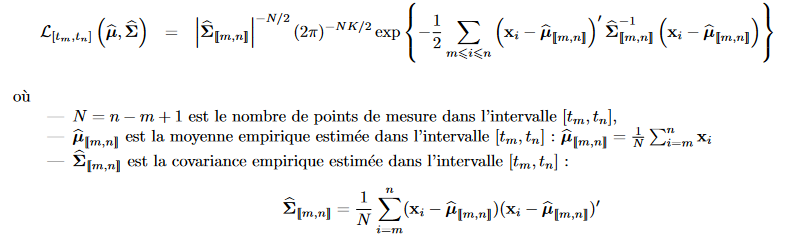

**Sous un intervale** 🔽

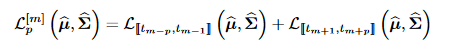

En utilisant la même fenêtre que les simulations précédentes nous pouvons avoir un résultats de : 

In [ ]:
vraissemblance(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1, method = "locale")

En moyenne, pour les 100 villes, nous avons : 5490.58


Nous pouvons alors voir que le résultat est très éloigner du modèle théorique et des méthodes précédentes essayer avec différentes fenêtre pour comparer les résultats : 

In [ ]:
vraissemblance(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 100, step = 1, method = "locale")

En moyenne, pour les 100 villes, nous avons : 5114.18


In [ ]:
vraissemblance(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 500, step = 1, method = "locale")

En moyenne, pour les 100 villes, nous avons : 5150.09


In [ ]:
vraissemblance(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 800, step = 1, method = "locale")

En moyenne, pour les 100 villes, nous avons : 5348.08


Nous pouvons voir, que peu importe la fenêtre d'analyse, le résultat est très éloigné du modèle théorique. 

La méthode de vraissemblance local est donc inutile pour l'analyse de ces données. 

# **Exercice 6️ : Analyse globale par fusion de maxima de vraisemblances**
---

Au vu de ce que nous avons exploité de la première partie, il est beaucoup plus logique d'aborder cette analyse avec une version globale. 

En effet, avec la version locale, les résultats ne correspondait pas du tout avec le modèle théorique. 

Nous allons alors essayer de se restreindre à une serie d'analyses globale monovariés. 

On cherche à trouver la variance ainsi que la moyenne autour du maxima de vraisemblances.

On souhaite découper les **100 villes** en un sous ensemble de villes :              

Exemple avec K = 10 

On souhaite faire des groupes de 10 villes pour faire le traitement sur un plus grand échantillon 

> Etape 1 : On prend nos 100 villes 

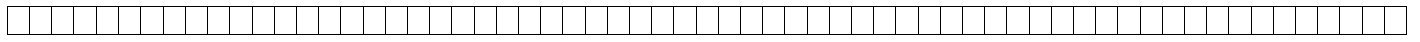

> Etape 2 : On découpe les 100 villes en petit lots de K élements 

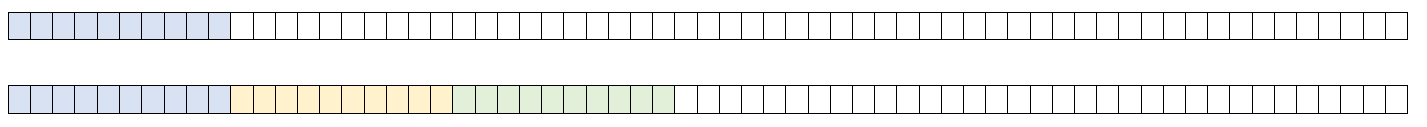

Nous pouvons ensuite faire nos analyses sur l'ensemble des ces sous ensembles.


In [ ]:
def maxima(Data, K, method):

    Max_array = Data
    P = 0
    fusion_mean_tab = []
    fusion_std_tab = []


    while (P + K)  <= len(Max_array):
      data = Max_array[P:P+K]
      fusion_mean_tab.append(np.mean(data))
      fusion_std_tab.append(np.std(data))
      P += K

    global_mean = np.mean(Max_array)
    global_std = np.std(Max_array)

    plt.figure(figsize=(20,4))
    axmean = plt.subplot(1,2,1)
    axmean.set_title("Moyenne par fusion de maxima par la méthode de " + str(method) +" avec K = " + str(K))
    axmean.axhline(y=(global_mean), color="red")
    axmean.plot(fusion_mean_tab)
    axmean.grid()

    axstd = plt.subplot(1,2,2)
    axstd.set_title("Variance par fusion de maxima par la méthode de " + str(method) +" avec K = " + str(K))
    axstd.plot(fusion_std_tab)
    axstd.grid()

    plt.show() 

In [ ]:
def getArrayVraissemblanceGlobale(mat, file_name, N, fenetre, step):

    Max_array = []
    Vraisemblance_totale = []
    for city in range(len(mat[file_name])):

        Vraisemblance_globale = []
        for element in range(fenetre, N-fenetre, step):

            X1 = mat[file_name][city][0:element-1]
            X2 = mat[file_name][city][element+1:N]

            si1 = np.std(X1)
            si2 = np.std(X2)

            N1 = len(X1)
            N2 = len(X2)

            ent = -(N1/2)*(1+math.log(2*math.pi*(si1**2))) - (N2/2) * (1+math.log(2*math.pi*(si2**2)))
            Vraisemblance_globale.append(ent)

        pos = Vraisemblance_globale.index(max(Vraisemblance_globale)) * step + fenetre
        Vraisemblance_totale.append(Vraisemblance_globale.index(max(Vraisemblance_globale)) * step + fenetre) 
        
        Max_array.append(np.mean(Vraisemblance_totale))

    return Max_array

In [ ]:
Data = getArrayVraissemblanceGlobale(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1)


Nous pouvons alors tester avec différentes valeurs de K, c'est à dire avec des groupes de villes de différentes tailles.

Par exemple avec K = **[5,10,20]**

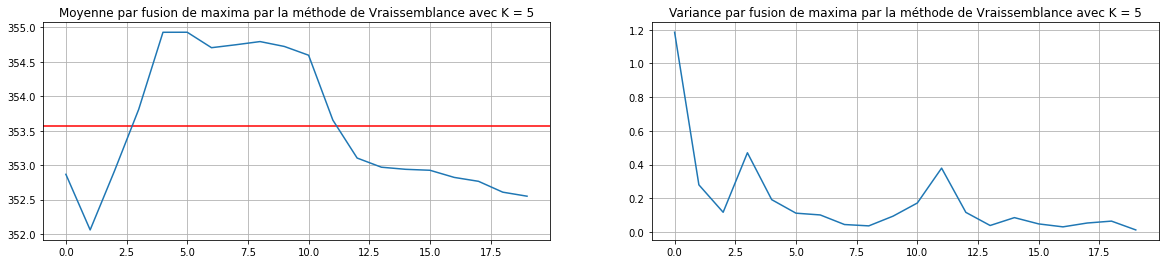

In [ ]:
maxima(Data = Data, K = 5, method = "Vraissemblance")

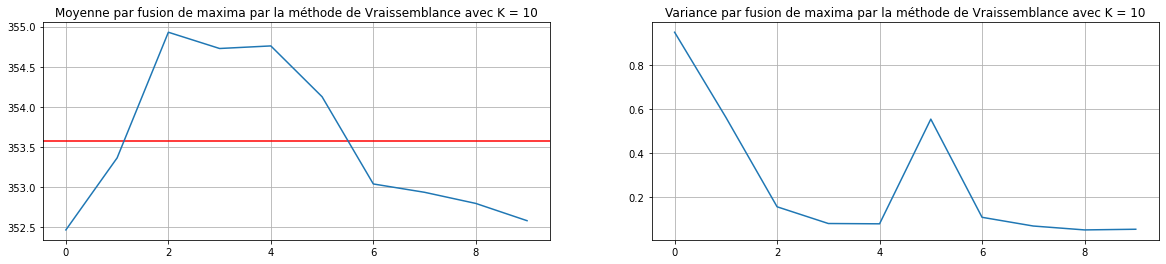

In [ ]:
maxima(Data = Data, K = 10, method = "Vraissemblance")

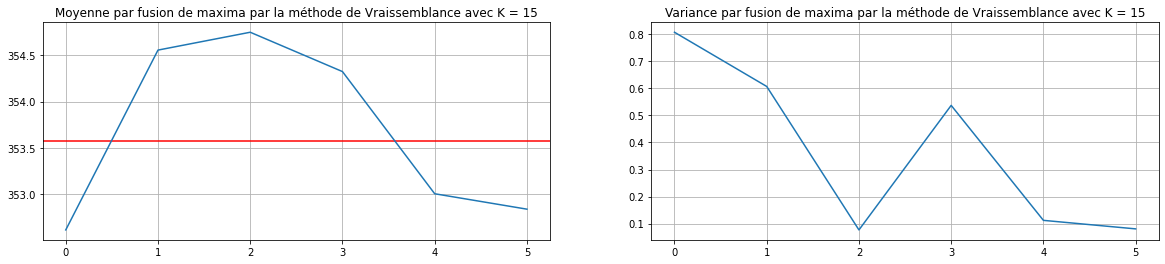

In [ ]:
maxima(Data = Data, K = 15, method = "Vraissemblance")

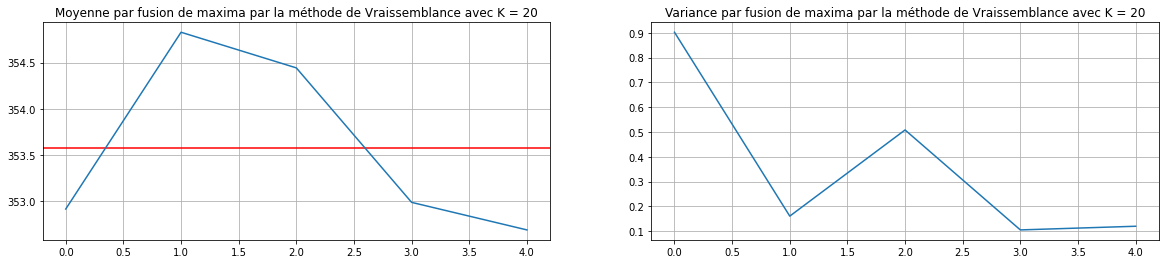

In [ ]:
maxima(Data = Data, K = 20, method = "Vraissemblance")

Nous pouvons voir que peu importe le nombre de valeur, nous sommes proche de la moyenne (représenter en rouge), et plus nous augmentons le nombre de valeurs, plus nous avons des valeurs proche de la moyenne. En effet, nous réduisons le nombre d'intervalles, et donc la dispersion des valeurs. 

# **Exercice 7️ : Analyse locale par fusion d’entropies relatives**
---

Pour l'analyse locale par fusion d'entropies relative, nous suivons le même système qu'avec l'analyse via la vraissemblance, nous prenons toujours un nombre de ville K pour faire des sous ensembles de villes. 

In [ ]:
def getArrayEntropieLocale(mat, file_name, N, fenetre, step):

    Max_array = []
    Entropie_totale = []
    for city in range(len(mat['X_pluv'])):

        Entropie_locale = []

        for element in range(fenetre, N-fenetre, step):

            #Locale
            X1 = mat["X_pluv"][city][element - fenetre:element-1]
            X2 = mat["X_pluv"][city][element:element + fenetre]

            mu1 = np.mean(X1)
            mu2 = np.mean(X2)
            si1 = np.std(X1)
            si2 = np.std(X2)

            ent = ((1 / 2) * ((mu1 - mu2) ** 2) * (1 / ((si1 ** 2) + (si2 ** 2))) + (1 / 2) * (((si2 ** 2) / (si1 ** 2)) + ((si1 ** 2) / (si2 ** 2))) - 1)

            Entropie_locale.append(ent)

        Entropie_totale.append(Entropie_locale.index(max(Entropie_locale))*step+200)

        Max_array.append(np.mean(Entropie_totale))

    return Max_array

In [ ]:
Data = getArrayEntropieLocale(mat = mat_pluv, file_name = 'X_pluv', N = 10000, fenetre = 200, step = 1)

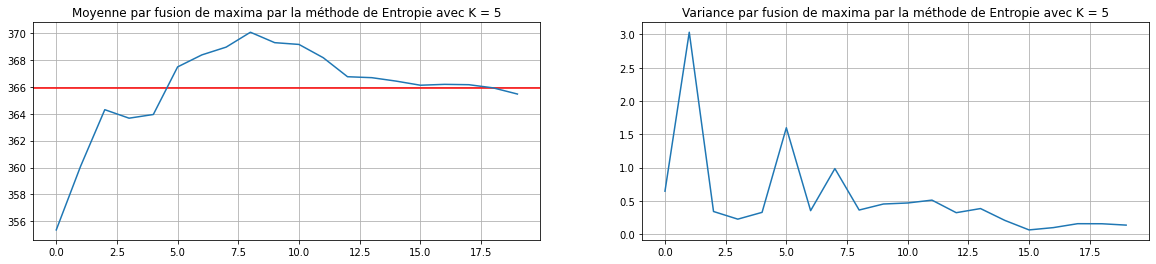

In [ ]:
maxima(Data = Data, K = 5, method = "Entropie")

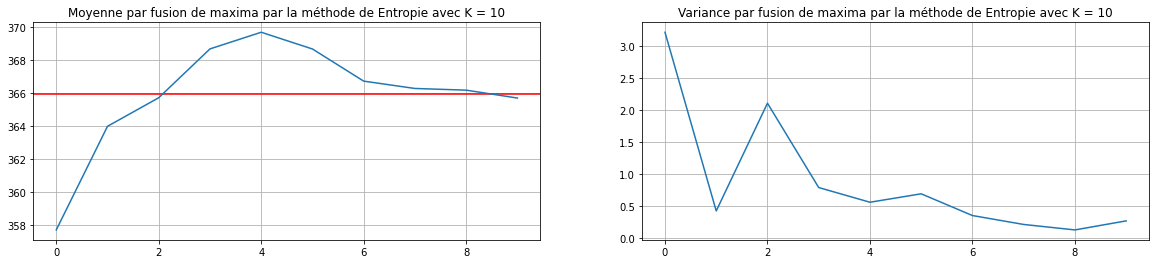

In [ ]:
maxima(Data = Data, K = 10, method = "Entropie")

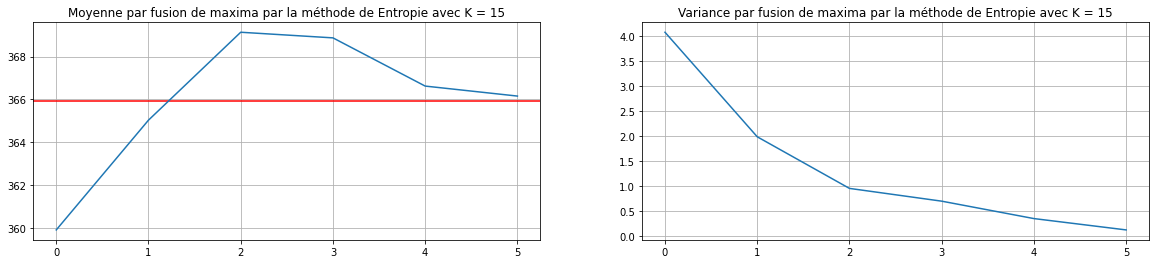

In [ ]:
maxima(Data = Data, K = 15, method = "Entropie")

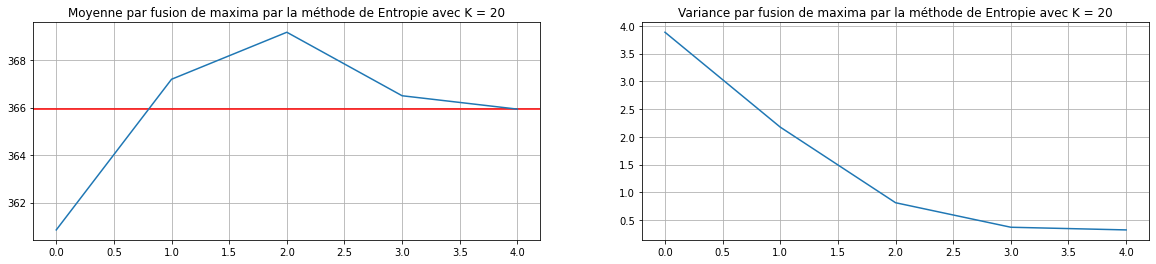

In [ ]:
maxima(Data = Data, K = 20, method = "Entropie")

Dans la même idée, nous pouvons voir que les valeurs sont proche de la valeur moyenne, l'intervale inférieur et supérieur reste faible, et plus nous augmentons le nombre de ville par intervalle, plus nous sommes proches. 

Cela s'explique logiquement par la réduction des intervalles, et le lissage des valeurs.

# **Exercice 8️ : Projet de detection de changement multiple**
---

Pour pour la première analyse de donnée, nous devons tout d'abord importer le fichier et une nouvelle fois importer l'ensemble des dépendances python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.stats
import math

!wget https://caullireau.com/Pixel_3Series.mat
mat_pixel = scipy.io.loadmat('Pixel_3Series.mat')

--2021-12-19 20:10:25--  https://caullireau.com/Pixel_3Series.mat
Resolving caullireau.com (caullireau.com)... 54.36.91.62
Connecting to caullireau.com (caullireau.com)|54.36.91.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6012 (5.9K)
Saving to: ‘Pixel_3Series.mat’

Pixel_3Series.mat   100%[===================>]   5.87K  --.-KB/s    in 0s      

2021-12-19 20:10:25 (420 MB/s) - ‘Pixel_3Series.mat’ saved [6012/6012]



Pour ce nouveau set de données, je vais utiliser deux méthodes, celle qui on prouvé un meilleur taux de réussite sur le jeu de données précédent. 

- Analyse par entropie locale
- Analyse par vraisemblance globale

### **Analyse 1** : Analyse par entropie locale

In [ ]:
def PixelEntropieLocal(N, data, fenetre, step):
    Entropie = []

    for city in range(len(mat_pixel["Pixel"])):
      entropie_local = []
      
      for element in range(fenetre, N-fenetre, step):

        X1 = mat_pixel["Pixel"][city][element - fenetre:element-1]
        X2 = mat_pixel["Pixel"][city][element:element + fenetre]

        mu1 = np.mean(X1)
        mu2 = np.mean(X2)
        si1 = np.std(X1)
        si2 = np.std(X2)

        ent = ((1 / 2) * ((mu1 - mu2) ** 2) * (1 / ((si1 ** 2) + (si2 ** 2))) + (1 / 2) * (((si2 ** 2) / (si1 ** 2)) + ((si1 ** 2) / (si2 ** 2))) - 1)
        entropie_local.append(ent)

      Entropie.append(entropie_local.index(max(entropie_local)) * step + fenetre)

      plt.figure(figsize=(10,5))
      plt.title("Pour l'élement " + str(city) + " maximum en " + str(entropie_local.index(max(entropie_local))))
      plt.plot(entropie_local)
      plt.axvline(entropie_local.index(max(entropie_local)), color='red')
      plt.grid()
      plt.show()

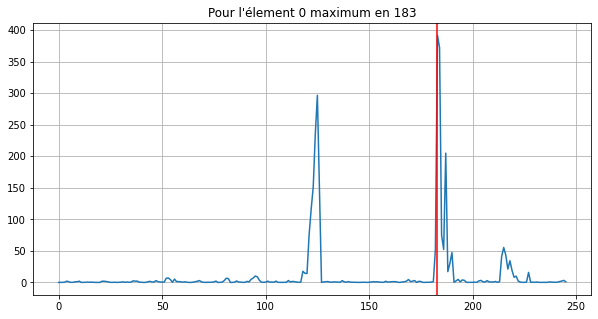

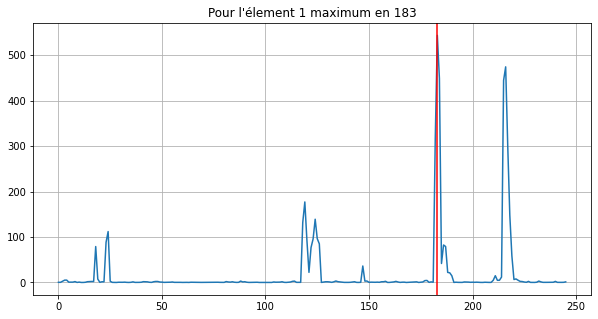

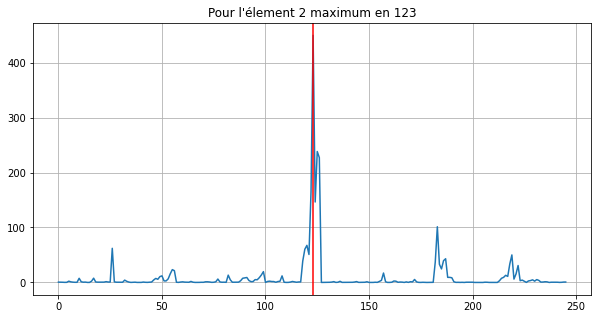

In [ ]:
PixelEntropieLocal(N = 256, data = mat_pixel, fenetre = 5, step = 1)

Nous pouvons donc voir 3 points maximum :     


```
Pour 1 : 183   
Pour 2 : 183   
Pour 3 : 123    
```

Les données semblent correctes en rapport avec le modèle de données.



### **Analyse 2** : Analyse par vraisemblance globale

In [ ]:
def PixelVraissemblanceGlobale(N, data, fenetre, step):
    Vraissemblance = []

    for city in range(len(mat_pixel["Pixel"])):
      vraissemblance_globale = []
      for element in range(fenetre, N-fenetre, step):

        X1 = mat_pixel["Pixel"][city][0:element-1]
        X2 = mat_pixel["Pixel"][city][element+1:N]

        si1 = np.std(X1)
        si2 = np.std(X2)

        N1 = len(X1)
        N2 = len(X2)

        vraissemblance = -(N1/2)*(1+math.log(2*math.pi*(si1**2))) - (N2/2) * (1+math.log(2*math.pi*(si2**2)))
        vraissemblance_globale.append(vraissemblance)

      Vraissemblance.append(vraissemblance_globale.index(max(vraissemblance_globale)) * step + fenetre)

      plt.figure(figsize=(10,5))
      plt.title("Pour l'élement" + str(city) + "maximum en " + str(vraissemblance_globale.index(max(vraissemblance_globale))))
      plt.plot(vraissemblance_globale)
      plt.axvline(vraissemblance_globale.index(max(vraissemblance_globale)), color='red')
      plt.grid()
      plt.show()

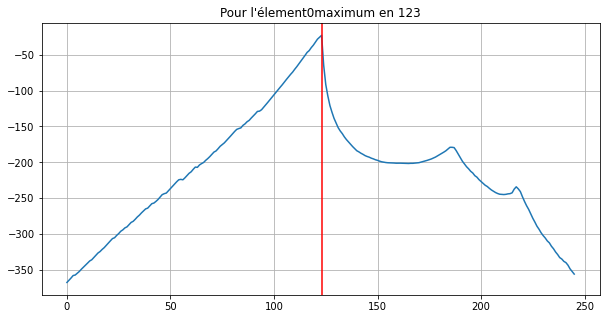

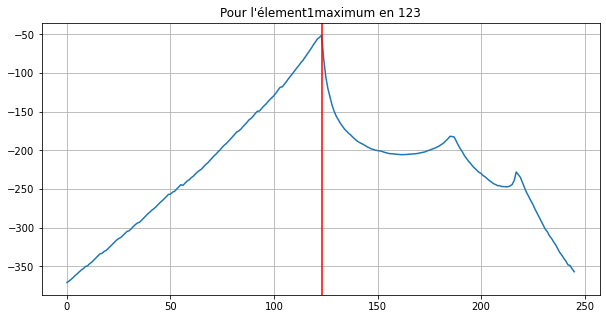

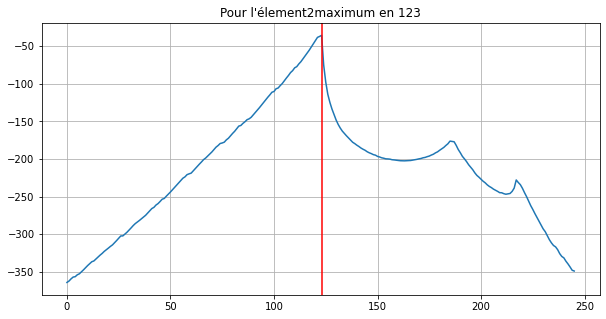

In [ ]:
PixelVraissemblanceGlobale(N = 256, data = mat_pixel, fenetre = 5, step = 1)

Sur ce second modèle, nous pouvons voir des résultats beaucoup plus floues. 

Nous allons alors avoir une préférence pour l'utilisation du premier modèle. 